# Comparison of GALAH DR3 with Globular Clusters

## Author(s): Sven Buder (SB, WG4)


### History:
200403 SB Created

In [1]:
# Preamble for notebook 

# Compatibility with Python 3
from __future__ import (absolute_import, division, print_function)

try:
    %matplotlib inline
    %config InlineBackend.figure_format='retina'
except:
    pass

# Basic packages
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
import glob
import scipy
import pandas as pd
from astropy.table import Table, hstack, vstack, join
from itertools import combinations, product
from tqdm.notebook import tqdm

# Matplotlib and associated packages for plotting
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.transforms import Bbox,TransformedBbox
from matplotlib.image import BboxImage
from matplotlib.legend_handler import HandlerBase
from matplotlib._png import read_png
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.colors import ListedColormap
import matplotlib.colors as colors

params = {
    'font.family'        : 'sans',
    'font.size'          : 17,
    'axes.labelsize'     : 20,
    'ytick.labelsize'    : 16,
    'xtick.labelsize'    : 16,
    'legend.fontsize'    : 20,
    'text.usetex'        : True, 
    'text.latex.preamble': [r'\usepackage{upgreek}', r'\usepackage{amsmath}'],
    }   
plt.rcParams.update(params)

_parula_data = [[0.2081, 0.1663, 0.5292], 
                [0.2116238095, 0.1897809524, 0.5776761905], 
                [0.212252381, 0.2137714286, 0.6269714286], 
                [0.2081, 0.2386, 0.6770857143], 
                [0.1959047619, 0.2644571429, 0.7279], 
                [0.1707285714, 0.2919380952, 0.779247619], 
                [0.1252714286, 0.3242428571, 0.8302714286], 
                [0.0591333333, 0.3598333333, 0.8683333333], 
                [0.0116952381, 0.3875095238, 0.8819571429], 
                [0.0059571429, 0.4086142857, 0.8828428571], 
                [0.0165142857, 0.4266, 0.8786333333], 
                [0.032852381, 0.4430428571, 0.8719571429], 
                [0.0498142857, 0.4585714286, 0.8640571429], 
                [0.0629333333, 0.4736904762, 0.8554380952], 
                [0.0722666667, 0.4886666667, 0.8467], 
                [0.0779428571, 0.5039857143, 0.8383714286], 
                [0.079347619, 0.5200238095, 0.8311809524], 
                [0.0749428571, 0.5375428571, 0.8262714286], 
                [0.0640571429, 0.5569857143, 0.8239571429], 
                [0.0487714286, 0.5772238095, 0.8228285714], 
                [0.0343428571, 0.5965809524, 0.819852381], 
                [0.0265, 0.6137, 0.8135], 
                [0.0238904762, 0.6286619048, 0.8037619048], 
                [0.0230904762, 0.6417857143, 0.7912666667], 
                [0.0227714286, 0.6534857143, 0.7767571429], 
                [0.0266619048, 0.6641952381, 0.7607190476], 
                [0.0383714286, 0.6742714286, 0.743552381], 
                [0.0589714286, 0.6837571429, 0.7253857143], 
                [0.0843, 0.6928333333, 0.7061666667], 
                [0.1132952381, 0.7015, 0.6858571429], 
                [0.1452714286, 0.7097571429, 0.6646285714], 
                [0.1801333333, 0.7176571429, 0.6424333333], 
                [0.2178285714, 0.7250428571, 0.6192619048], 
                [0.2586428571, 0.7317142857, 0.5954285714], 
                [0.3021714286, 0.7376047619, 0.5711857143], 
                [0.3481666667, 0.7424333333, 0.5472666667], 
                [0.3952571429, 0.7459, 0.5244428571], 
                [0.4420095238, 0.7480809524, 0.5033142857], 
                [0.4871238095, 0.7490619048, 0.4839761905], 
                [0.5300285714, 0.7491142857, 0.4661142857], 
                [0.5708571429, 0.7485190476, 0.4493904762],
                [0.609852381, 0.7473142857, 0.4336857143], 
                [0.6473, 0.7456, 0.4188], 
                [0.6834190476, 0.7434761905, 0.4044333333], 
                [0.7184095238, 0.7411333333, 0.3904761905], 
                [0.7524857143, 0.7384, 0.3768142857], 
                [0.7858428571, 0.7355666667, 0.3632714286], 
                [0.8185047619, 0.7327333333, 0.3497904762], 
                [0.8506571429, 0.7299, 0.3360285714], 
                [0.8824333333, 0.7274333333, 0.3217], 
                [0.9139333333, 0.7257857143, 0.3062761905], 
                [0.9449571429, 0.7261142857, 0.2886428571], 
                [0.9738952381, 0.7313952381, 0.266647619], 
                [0.9937714286, 0.7454571429, 0.240347619], 
                [0.9990428571, 0.7653142857, 0.2164142857], 
                [0.9955333333, 0.7860571429, 0.196652381], 
                [0.988, 0.8066, 0.1793666667], 
                [0.9788571429, 0.8271428571, 0.1633142857], 
                [0.9697, 0.8481380952, 0.147452381], 
                [0.9625857143, 0.8705142857, 0.1309], 
                [0.9588714286, 0.8949, 0.1132428571], 
                [0.9598238095, 0.9218333333, 0.0948380952], 
                [0.9661, 0.9514428571, 0.0755333333], 
                [0.9763, 0.9831, 0.0538]]

parula = ListedColormap(_parula_data, name='parula')
parula_zero = _parula_data[0]
parula_0 = ListedColormap(_parula_data, name='parula_0')
parula_0.set_bad((1,1,1))
parula_r = ListedColormap(_parula_data[::-1], name='parula_r')

willi_blau = [0.0722666667, 0.4886666667, 0.8467]

In [2]:
dr3 = Table.read('../../../catalogs/v1/GALAH_DR3_main_allspec_v1.fits')

In [3]:
apo = Table.read('../../../../Surveys/APOGEE_DR16.fits')
apo_47tuc = (
    (np.abs(apo['RA'] - 6.023625) < 3) &
    (np.abs(apo['DEC'] - (-72.081276)) < 3) &
    (np.abs(apo['VHELIO_AVG'] - (-17.45)) < 15) &
    (np.abs(apo['GAIA_PMRA'] - (5.25)) < 1.5) &
    (np.abs(apo['GAIA_PMDEC'] - (-2.53)) < 1.5) &
    (apo['ASPCAPFLAG']==0) & 
    (apo['FE_H_FLAG']==0) & 
    (apo['FE_H'] > -5) & 
    (apo['TEFF'] > -5)
)
apo_ngc1851 = (
    (np.abs(apo['RA'] - 78.528160) < 3) &
    (np.abs(apo['DEC'] - (-40.046555)) < 3) &
    (np.abs(apo['VHELIO_AVG'] - (320.30)) < 15) &
    (np.abs(apo['GAIA_PMRA'] - (2.12)) < 1.5)&
    (np.abs(apo['GAIA_PMDEC'] - (-0.63)) < 1.5)&
    (apo['ASPCAPFLAG']==0) & 
    (apo['FE_H_FLAG']==0) & 
    (apo['FE_H'] > -5) & 
    (apo['TEFF'] > -5)
)
apo_ngc6362 = (
    (np.abs(apo['RA'] - 262.979095) < 3) &
    (np.abs(apo['DEC'] - (-67.048332)) < 3) &
    (np.abs(apo['VHELIO_AVG'] - (-14.58)) < 15) &
    (np.abs(apo['GAIA_PMRA'] - (-5.49)) < 1.5)&
    (np.abs(apo['GAIA_PMDEC'] - (-4.76)) < 1.5)&
    (apo['ASPCAPFLAG']==0) & 
    (apo['FE_H_FLAG']==0) & 
    (apo['FE_H'] > -5) & 
    (apo['TEFF'] > -5)
)
apo_ngc6397 = (
    (np.abs(apo['RA'] - 265.175385) < 3) &
    (np.abs(apo['DEC'] - (-53.674335)) < 3) &
    (np.abs(apo['VHELIO_AVG'] - (-18.39)) < 15) &
    (np.abs(apo['GAIA_PMRA'] - (3.30)) < 1.5)&
    (np.abs(apo['GAIA_PMDEC'] - (-17.60)) < 1.5)&
    (apo['ASPCAPFLAG']==0) & 
    (apo['FE_H_FLAG']==0) & 
    (apo['FE_H'] > -5) & 
    (apo['TEFF'] > -5)
)
apo_ngc288 = (
    (np.abs(apo['RA'] - 13.188500) < 3) &
    (np.abs(apo['DEC'] - (-26.582611)) < 3) &
    (np.abs(apo['VHELIO_AVG'] - (-44.83)) < 15) &
    (np.abs(apo['GAIA_PMRA'] - (4.22)) < 1.5)&
    (np.abs(apo['GAIA_PMDEC'] - (-5.65)) < 1.5)&
    (apo['ASPCAPFLAG']==0) & 
    (apo['FE_H_FLAG']==0) & 
    (apo['FE_H'] > -5) & 
    (apo['TEFF'] > -5)
)
apo_ngc362 = (
    (np.abs(apo['RA'] - 15.809416) < 3) &
    (np.abs(apo['DEC'] - (-70.848778)) < 3) &
    (np.abs(apo['VHELIO_AVG'] - (223.26)) < 15) &
    (np.abs(apo['GAIA_PMRA'] - (6.71)) < 1.5)&
    (np.abs(apo['GAIA_PMDEC'] - (-2.51)) < 1.5)&
    (apo['ASPCAPFLAG']==0) & 
    (apo['FE_H_FLAG']==0) & 
    (apo['FE_H'] > -5) & 
    (apo['TEFF'] > -5)
)
apo_ngc7099 = (
    (np.abs(apo['RA'] - 325.092133) < 3) &
    (np.abs(apo['DEC'] - (-23.179861)) < 3) &
    (np.abs(apo['VHELIO_AVG'] - (-185.19)) < 15) &
    (np.abs(apo['GAIA_PMRA'] - (-0.73)) < 1.5)&
    (np.abs(apo['GAIA_PMDEC'] - (-7.24)) < 1.5)&
    (apo['ASPCAPFLAG']==0) & 
    (apo['FE_H_FLAG']==0) & 
    (apo['FE_H'] > -5) & 
    (apo['TEFF'] > -5)
)
apo_ngc5139 = (
    (np.abs(apo['RA'] - 201.696838) < 3) &
    (np.abs(apo['DEC'] - (-47.479584)) < 3) &
    (np.abs(apo['VHELIO_AVG'] - (234.28)) < 15) &
    (np.abs(apo['GAIA_PMRA'] - (-3.24)) < 1.5)&
    (np.abs(apo['GAIA_PMDEC'] - (-6.73)) < 1.5)&
    (apo['ASPCAPFLAG']==0) & 
    (apo['FE_H_FLAG']==0) & 
    (apo['FE_H'] > -5) & 
    (apo['TEFF'] > -5)
)

In [4]:
dr2ext = Table.read('../../../../Surveys/GALAH_DR2.1_catalog_extended.fits')
dr2 = Table.read('../../../../Surveys/GALAH_DR2.1_catalog.fits')

In [5]:
dr3_dr2 = join(dr3, dr2, keys='sobject_id')
dr3_dr2ext = join(dr3, dr2ext, keys='sobject_id')

# Select members from Janez' membership file

In [6]:
cluster_file = '../../../input/SME_input_fields/GALAH_clusters_lbol'
(cluster_id, cluster_sobject_id) = np.loadtxt(cluster_file,usecols=(0,1),unpack=True,dtype=str)

globular_clusters = dict()
globular_clusters['members'] = []
globular_clusters['oid'] = []
globular_clusters['name'] = []

initial_members = []

for each_cluster in np.unique(cluster_id):
    if each_cluster in ['47Tuc_lbol','NGC288_lbol','NGC362_lbol','NGC1851_lbol','NGC6362_lbol','NGC6397_lbol','NGC7099_lbol','OmegaCen_lbol']:
        if each_cluster[:3]=='NGC':
            cname = 'NGC_'+each_cluster[3:-5]
        elif each_cluster[:-5]=='47Tuc':
            cname = '47_Tuc'
        elif each_cluster[:-5]=='OmegaCen':
            cname = 'NGC_5139'
        
        globular_clusters['name'].append(cname)
        initial_members.append(np.array(cluster_sobject_id[(cluster_id == each_cluster)],dtype=int))

globular_clusters['name']=np.array(globular_clusters['name'])
        
for each_cluster, all_members in zip(globular_clusters['name'],initial_members):
    members = []
    oid = []
    
    for each_member in all_members:
        match = np.where(each_member == dr3['sobject_id'])[0]
        if len(match) == 1:
            oid.append(match[0])
            members.append(each_member)
    globular_clusters['members'].append(np.array(members))
    globular_clusters['oid'].append(np.array(oid))

In [7]:
globular_clusters['dr3_dr2'] = []
for each_id, each_cluster in enumerate(globular_clusters['name']):
    dr3_dr2_members = []
    for each_sid in globular_clusters['members'][each_id]:
        match = np.where(each_sid == dr3_dr2['sobject_id'])[0]
        if len(match) == 1:
            dr3_dr2_members.append(match[0])
    globular_clusters['dr3_dr2'].append(np.array(dr3_dr2_members))
    
globular_clusters['dr3_dr2ext'] = []
for each_id, each_cluster in enumerate(globular_clusters['name']):
    dr3_dr2_members = []
    for each_sid in globular_clusters['members'][each_id]:
        match = np.where(each_sid == dr3_dr2ext['sobject_id'])[0]
        if len(match) == 1:
            dr3_dr2_members.append(match[0])
    globular_clusters['dr3_dr2ext'].append(np.array(dr3_dr2_members))

# Comparison of Na-O anticorrelations for GALAH DR2 and GALAH DR3

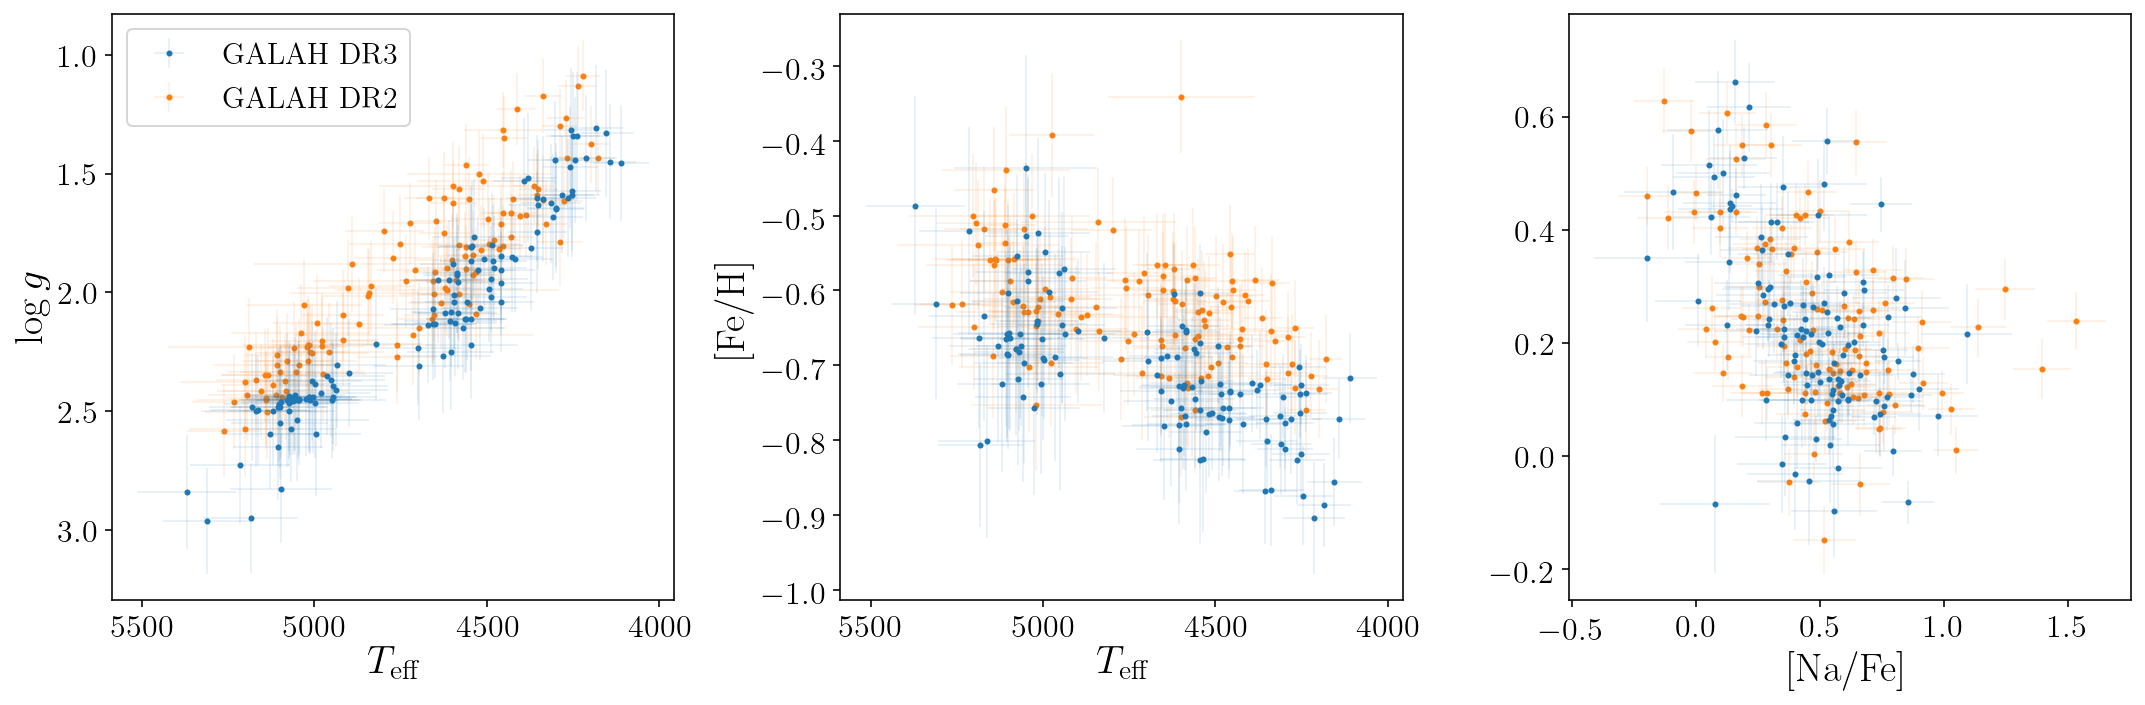

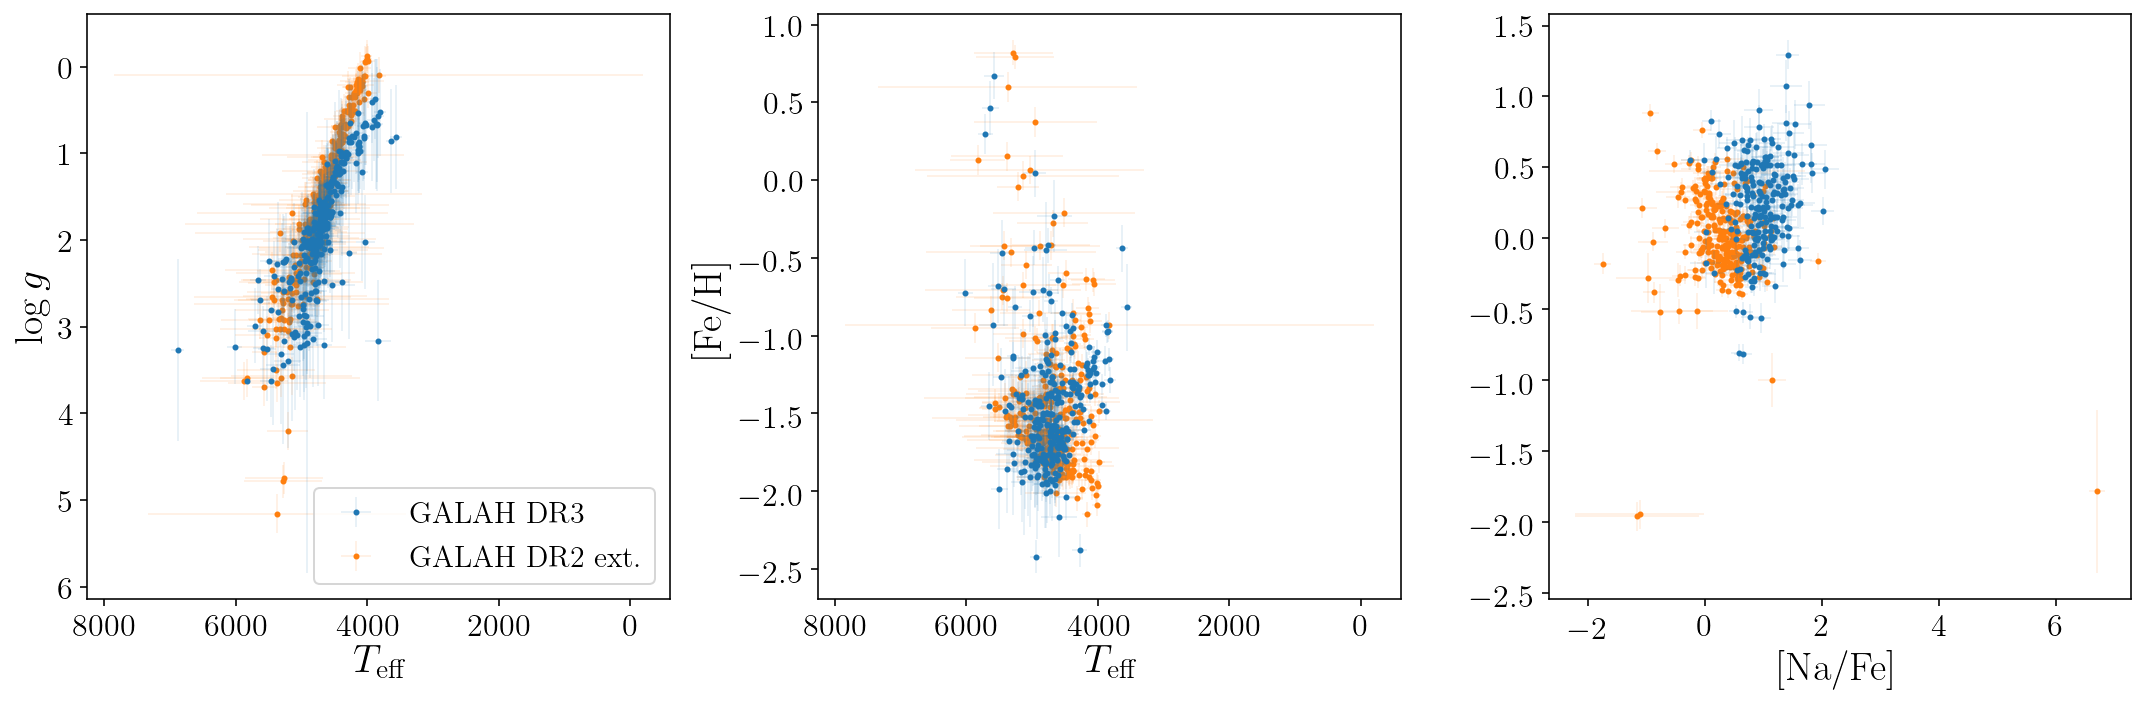

In [8]:
def plot_dr3_dr2(cluster_short_name, extended=True, plot_dr2=True, plot_dr3=True, plot_connection=False):
    """
    Requested by YST: 
    plots to show how the Na-O anticorrelation looked like in GALAH DR2 
    and compared to GALAH DR3 now
    """
    cluster_id = np.where(cluster_short_name == globular_clusters['name'])[0][0]
    if extended:
        dr3_dr2_oid = globular_clusters['dr3_dr2ext'][cluster_id]
    else:
        dr3_dr2_oid = globular_clusters['dr3_dr2'][cluster_id]
    
    use = (
        (dr3_dr2['flag_cannon'][dr3_dr2_oid] == 0) &
        (dr3_dr2['flag_sp'][dr3_dr2_oid] == 0) &
        (dr3_dr2['flag_O_fe'][dr3_dr2_oid] == 0)&
        (dr3_dr2['flag_Na_fe'][dr3_dr2_oid] == 0)
    )
    
    f, gs = plt.subplots(1,3,figsize=(15,5))
    
    kwarfs_errorbar = dict(fmt='o',ms=2,lw=0.1)
    
    for ax_id, ax in enumerate(gs):
        
        if ax_id == 0:
            
            if extended:
                ax.errorbar(
                    dr3_dr2ext['teff'][dr3_dr2_oid][use],
                    dr3_dr2ext['logg'][dr3_dr2_oid][use],
                    xerr = dr3_dr2ext['e_teff'][dr3_dr2_oid][use],
                    yerr = dr3_dr2ext['e_logg'][dr3_dr2_oid][use],
                    c='C0',label=r'GALAH DR3',# \texttt{flag\_sp} = 0',
                    zorder=2,
                    **kwarfs_errorbar
                )
                ax.errorbar(
                    dr3_dr2ext['Teff_cannon'][dr3_dr2_oid][use],
                    dr3_dr2ext['Logg_cannon'][dr3_dr2_oid][use],
                    xerr = dr3_dr2ext['e_Teff_cannon'][dr3_dr2_oid][use],
                    yerr = dr3_dr2ext['e_Logg_cannon'][dr3_dr2_oid][use],
                    c='C1',label=r'GALAH DR2 ext.',# \texttt{flag\_cannon} = 0',
                    zorder=1,
                    **kwarfs_errorbar
                )
            else:
                ax.errorbar(
                    dr3_dr2['teff_1'][dr3_dr2_oid][use],
                    dr3_dr2['logg_1'][dr3_dr2_oid][use],
                    xerr = dr3_dr2['e_teff_1'][dr3_dr2_oid][use],
                    yerr = dr3_dr2['e_logg_1'][dr3_dr2_oid][use],
                    c='C0',label=r'GALAH DR3',# \texttt{flag\_sp} = 0',
                    zorder=2,
                    **kwarfs_errorbar
                )
                ax.errorbar(
                    dr3_dr2['teff_2'][dr3_dr2_oid][use],
                    dr3_dr2['logg_2'][dr3_dr2_oid][use],
                    xerr = dr3_dr2['e_teff_2'][dr3_dr2_oid][use],
                    yerr = dr3_dr2['e_logg_2'][dr3_dr2_oid][use],
                    c='C1',label=r'GALAH DR2',# \texttt{flag\_cannon} = 0',
                    zorder=1,
                    **kwarfs_errorbar
                )
                if plot_connection:
                    ax.plot(
                        [dr3_dr2['teff_1'][dr3_dr2_oid][use],dr3_dr2['teff_2'][dr3_dr2_oid][use]],
                        [dr3_dr2['logg_1'][dr3_dr2_oid][use],dr3_dr2['logg_2'][dr3_dr2_oid][use]],
                        c='k',lw=0.2,
                        zorder=3,ls='dotted'
                    )
            ax.invert_xaxis()
            ax.invert_yaxis()
#             ax.set_xlim(5500,3500)
#             ax.set_ylim(5,0)
            ax.legend(fontsize=15)
            ax.set_xlabel(r'$T_\text{eff}$')
            ax.set_ylabel(r'$\log g$')
            
        if ax_id == 1:

            if extended:
                ax.errorbar(
                    dr3_dr2ext['teff'][dr3_dr2_oid][use],
                    dr3_dr2ext['fe_h'][dr3_dr2_oid][use],
                    xerr = dr3_dr2ext['e_teff'][dr3_dr2_oid][use],
                    yerr = dr3_dr2ext['e_fe_h'][dr3_dr2_oid][use],
                    c='C0',label=r'GALAH DR3',# \texttt{flag\_sp} = 0',
                    zorder=2,
                    **kwarfs_errorbar
                )
                ax.errorbar(
                    dr3_dr2ext['Teff_cannon'][dr3_dr2_oid][use],
                    dr3_dr2ext['Feh_cannon'][dr3_dr2_oid][use],
                    xerr = dr3_dr2ext['e_Teff_cannon'][dr3_dr2_oid][use],
                    yerr = dr3_dr2ext['e_Feh_cannon'][dr3_dr2_oid][use],
                    c='C1',label=r'GALAH DR2 ext.',# \texttt{flag\_cannon} = 0',
                    zorder=1,
                    **kwarfs_errorbar
                )
            else:
                ax.errorbar(
                    dr3_dr2['teff_1'][dr3_dr2_oid][use],
                    dr3_dr2['fe_h_1'][dr3_dr2_oid][use],
                    xerr = dr3_dr2['e_teff_1'][dr3_dr2_oid][use],
                    yerr = dr3_dr2['e_fe_h_1'][dr3_dr2_oid][use],
                    c='C0',label=r'GALAH DR3',# \texttt{flag\_sp} = 0',
                    zorder=2,
                    **kwarfs_errorbar
                )
                ax.errorbar(
                    dr3_dr2['teff_2'][dr3_dr2_oid][use],
                    dr3_dr2['fe_h_2'][dr3_dr2_oid][use],
                    xerr = dr3_dr2['e_teff_2'][dr3_dr2_oid][use],
                    yerr = dr3_dr2['e_fe_h_2'][dr3_dr2_oid][use],
                    c='C1',label=r'GALAH DR2',# \texttt{flag\_cannon} = 0',
                    zorder=1,
                    **kwarfs_errorbar
                )
                if plot_connection:
                    ax.plot(
                        [dr3_dr2['teff_1'][dr3_dr2_oid][use],dr3_dr2['teff_2'][dr3_dr2_oid][use]],
                        [dr3_dr2['fe_h_1'][dr3_dr2_oid][use],dr3_dr2['fe_h_2'][dr3_dr2_oid][use]],
                        c='k',lw=0.2,
                        zorder=3,ls='dotted'
                    )
            ax.set_xlabel(r'$T_\text{eff}$')
            ax.set_ylabel(r'[Fe/H]')
            ax.invert_xaxis()
#             ax.set_xlim(5500,3500)
#             ax.set_ylim(-1.0,-0.3)

        if ax_id == 2:
            
            if extended:
                ax.errorbar(
                    dr3_dr2ext['O_fe'][dr3_dr2_oid][use],
                    dr3_dr2ext['Na_fe'][dr3_dr2_oid][use],
                    xerr = dr3_dr2ext['e_O_fe'][dr3_dr2_oid][use],
                    yerr = dr3_dr2ext['e_Na_fe'][dr3_dr2_oid][use],
                    c='C0',label=r'GALAH DR3',# \texttt{flag\_sp} = 0',
                    zorder=2,
                    **kwarfs_errorbar
                )
                ax.errorbar(
                    dr3_dr2ext['O_abund_cannon'][dr3_dr2_oid][use],
                    dr3_dr2ext['Na_abund_cannon'][dr3_dr2_oid][use],
                    xerr = dr3_dr2ext['e_O_abund_cannon'][dr3_dr2_oid][use],
                    yerr = dr3_dr2ext['e_Na_abund_cannon'][dr3_dr2_oid][use],
                    c='C1',label=r'GALAH DR2 (ext.)',# \texttt{flag\_cannon} = 0',
                    zorder=1,
                    **kwarfs_errorbar
                )
            else:
                ax.errorbar(
                    dr3_dr2['O_fe'][dr3_dr2_oid][use],
                    dr3_dr2['Na_fe'][dr3_dr2_oid][use],
                    xerr = dr3_dr2['e_O_fe'][dr3_dr2_oid][use],
                    yerr = dr3_dr2['e_Na_fe'][dr3_dr2_oid][use],
                    c='C0',label=r'GALAH DR3',# \texttt{flag\_sp} = 0',
                    zorder=2,
                    **kwarfs_errorbar
                )
                ax.errorbar(
                    dr3_dr2['o_fe'][dr3_dr2_oid][use],
                    dr3_dr2['na_fe'][dr3_dr2_oid][use],
                    xerr = dr3_dr2['e_o_fe'][dr3_dr2_oid][use],
                    yerr = dr3_dr2['e_na_fe'][dr3_dr2_oid][use],
                    c='C1',label=r'GALAH DR2',# \texttt{flag\_cannon} = 0',
                    zorder=1,
                    **kwarfs_errorbar
                )
                if plot_connection:
                    ax.plot(
                        [dr3_dr2['o_fe'][dr3_dr2_oid][use],dr3_dr2['O_fe'][dr3_dr2_oid][use]],
                        [dr3_dr2['na_fe'][dr3_dr2_oid][use],dr3_dr2['Na_fe'][dr3_dr2_oid][use]],
                        c='k',lw=0.2,
                        zorder=3,ls='dotted'
                    )
#             ax.set_xlim(-0.5,1.5)
#             ax.set_ylim(-0.3,0.8)
            ax.set_xlabel('[O/Fe]')
            ax.set_xlabel('[Na/Fe]')
            plt.tight_layout()
            plt.savefig('Comp_DR3_DR2_'+cluster_short_name+'.png',bbox_inches='tight',dpi=200)

plot_dr3_dr2(cluster_short_name='47_Tuc',extended=False)
plot_dr3_dr2(cluster_short_name='NGC_5139',extended=True)

# Analysis of the Globular clusters in GALAH DR3

47_Tuc
Mean and std:-0.701,0.117


/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:745: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Median and std-error:-0.704,0.005
NGC_288
Mean and std:-1.070,0.089


/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:745: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Median and std-error:-1.058,0.013
NGC_7099
Mean and std:-2.198,0.192


/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:745: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Median and std-error:-2.180,0.040
NGC_5139
Mean and std:-1.530,0.319


/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:745: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Median and std-error:-1.602,0.017


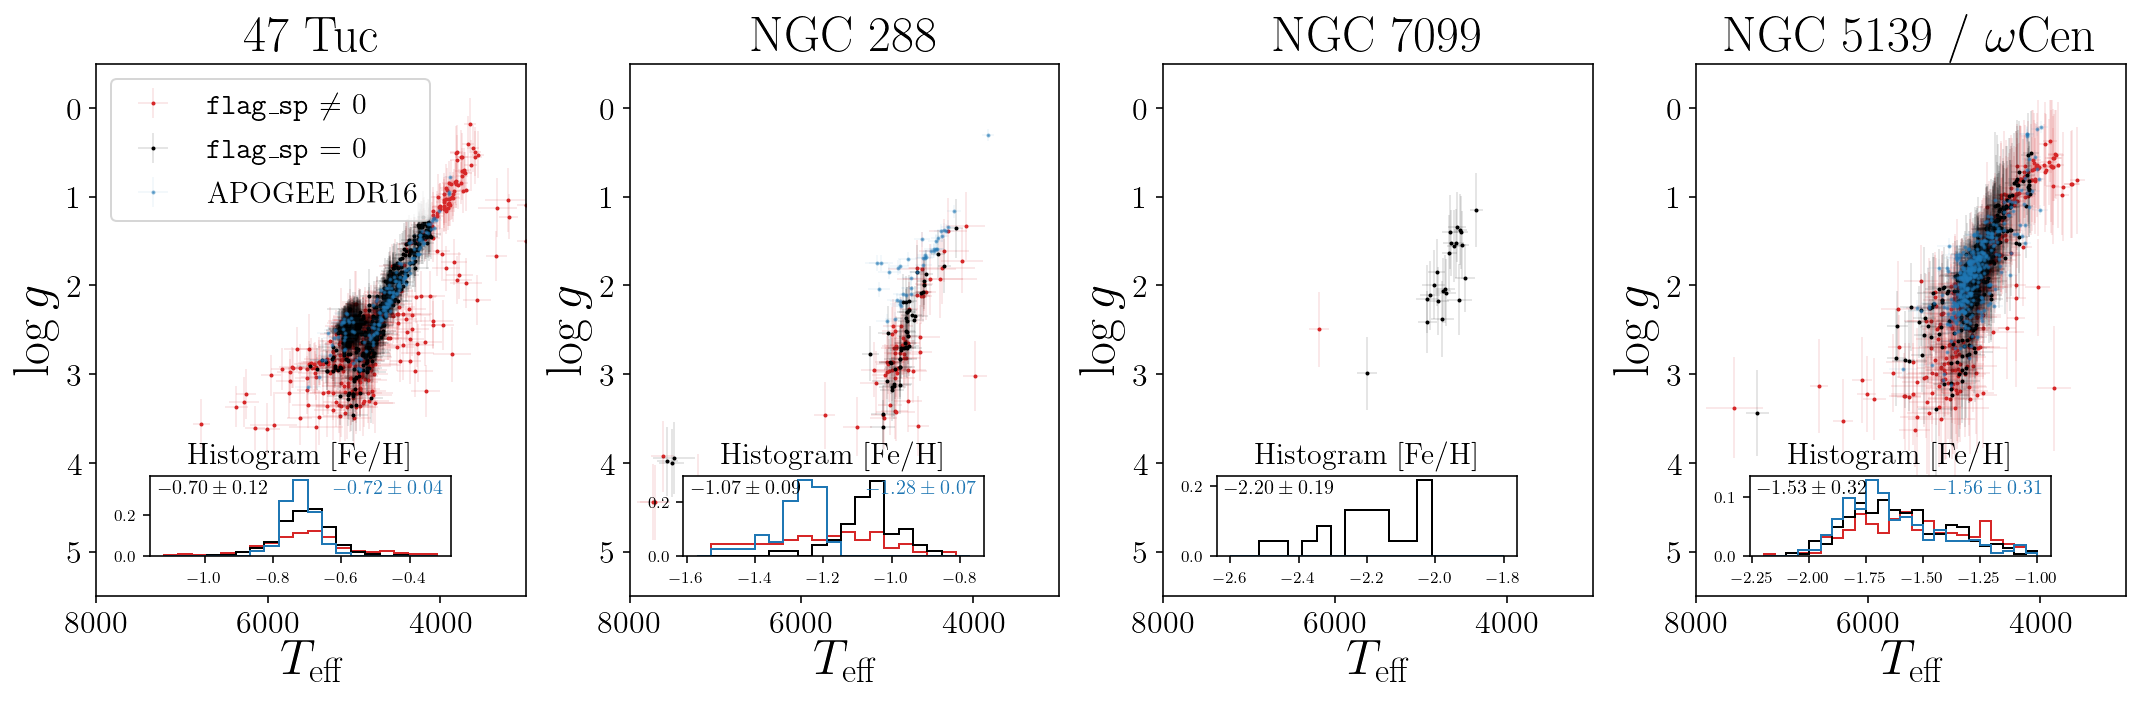

In [10]:
def cluster_kiel(flag_sp_cut=0):
    
    f, gs = plt.subplots(1,4,figsize=(15,5))
    
    for ax_id, cluster_short_name in enumerate(['47_Tuc', 'NGC_288', 'NGC_7099', 'NGC_5139']):
        
        ax = gs[ax_id]
        
        cluster_id = np.where(cluster_short_name == globular_clusters['name'])[0][0]
        cluster_oid = globular_clusters['oid'][cluster_id]


        kwarfs_errorbar = dict(fmt='o',ms=1,lw=0.1)

        flag_0 = (dr3['flag_sp'][cluster_oid] <= flag_sp_cut) & (dr3['e_logg'][cluster_oid] < 1)
        flag_not_0 = (dr3['flag_sp'][cluster_oid] > flag_sp_cut) & (dr3['e_logg'][cluster_oid] < 1)
        flag_0_not_hotcool = flag_0 & (dr3['teff'][cluster_oid] <6500) & (dr3['teff'][cluster_oid] >4500)

        if cluster_short_name != 'NGC_5139':
            ax.set_title(cluster_short_name.replace('_',' '),fontsize=25)
        else:
            ax.set_title(r'NGC 5139 / $\omega$Cen',fontsize=25)

        ax.errorbar(
            dr3['teff'][cluster_oid][flag_not_0],
            dr3['logg'][cluster_oid][flag_not_0],
            xerr = dr3['e_teff'][cluster_oid][flag_not_0],
            yerr = dr3['e_logg'][cluster_oid][flag_not_0],
            c='C3',label=r'\texttt{flag\_sp} $\neq$ 0',
            zorder=2,
            **kwarfs_errorbar
        )

        ax.errorbar(
            dr3['teff'][cluster_oid][flag_0],
            dr3['logg'][cluster_oid][flag_0],
            xerr = dr3['e_teff'][cluster_oid][flag_0],
            yerr = dr3['e_logg'][cluster_oid][flag_0],
            c='k',label=r'\texttt{flag\_sp} = 0',
            zorder=3,
            **kwarfs_errorbar
        )
        
        if cluster_short_name=='47_Tuc':
            apo_s = apo_47tuc
            gc_feh = -0.72
        if cluster_short_name=='NGC_1851':
            apo_s = apo_ngc1851
            gc_feh = -1.0
        if cluster_short_name=='NGC_288':
            apo_s = apo_ngc288
            gc_feh = -1.17
        if cluster_short_name=='NGC_362':
            apo_s = apo_ngc362
            gc_feh = -1.1
        if cluster_short_name=='NGC_6362':
            apo_s = apo_ngc6362
            gc_feh = -1.1
        if cluster_short_name=='NGC_6397':
            apo_s = apo_ngc6397
            gc_feh = -2.0
        if cluster_short_name=='NGC_7099':
            apo_s = apo_ngc7099
            gc_feh = -2.2
        if cluster_short_name=='NGC_5139':
            apo_s = apo_ngc5139
            gc_feh = -1.7

        if cluster_short_name in ['47_Tuc','NGC_1851','NGC_6362','NGC_6397','NGC_288','NGC_362','NGC_7099','NGC_5139']:
            ax.errorbar(
                apo['TEFF'][apo_s],
                apo['LOGG'][apo_s],
                xerr = apo['TEFF_ERR'][apo_s],
                yerr = apo['LOGG_ERR'][apo_s],
                c='C0',label=r'APOGEE DR16',
                zorder=4,alpha=0.5,
                **kwarfs_errorbar
            )

        ax.set_xlim(8000,3000)
        ax.set_xlabel(r'$T_\text{eff}$',fontsize=25)
        ax.set_ylim(5.5,-0.5)
        ax.set_ylabel(r'$\log g$',fontsize=25)
        if ax_id==0:
            ax.legend(fontsize=15,loc='upper left')

    plt.tight_layout()

    for ax_id, cluster_short_name in enumerate(['47_Tuc', 'NGC_288', 'NGC_7099', 'NGC_5139']):

        ax = gs[ax_id]
        
        cluster_id = np.where(cluster_short_name == globular_clusters['name'])[0][0]
        cluster_oid = globular_clusters['oid'][cluster_id]

        flag_0 = (dr3['flag_sp'][cluster_oid] <= flag_sp_cut) & (dr3['e_logg'][cluster_oid] < 1)
        flag_not_0 = (dr3['flag_sp'][cluster_oid] > flag_sp_cut) & (dr3['e_logg'][cluster_oid] < 1)
        flag_0_not_hotcool = flag_0 & (dr3['teff'][cluster_oid] <6500) & (dr3['teff'][cluster_oid] >4500)

        subpos = [0.125,0.075,0.7,0.15]
        box = ax.get_position()
        width = box.width
        height = box.height
        inax_position  = ax.transAxes.transform(subpos[0:2])
        transFigure = f.transFigure.inverted()
        infig_position = transFigure.transform(inax_position)    
        x = infig_position[0]
        y = infig_position[1]
        width *= subpos[2]
        height *= subpos[3]  # <= Typo was here
        subax = f.add_axes([x,y,width,height])
        subax.xaxis.set_tick_params(labelsize=8)
        subax.yaxis.set_tick_params(labelsize=8)
        
        if cluster_short_name=='47_Tuc':
            apo_s = apo_47tuc
            gc_feh = -0.72
        if cluster_short_name=='NGC_1851':
            apo_s = apo_ngc1851
            gc_feh = -1.0
        if cluster_short_name=='NGC_288':
            apo_s = apo_ngc288
            gc_feh = -1.17
        if cluster_short_name=='NGC_362':
            apo_s = apo_ngc362
            gc_feh = -1.1
        if cluster_short_name=='NGC_6362':
            apo_s = apo_ngc6362
            gc_feh = -1.1
        if cluster_short_name=='NGC_6397':
            apo_s = apo_ngc6397
            gc_feh = -2.0
        if cluster_short_name=='NGC_7099':
            apo_s = apo_ngc7099
            gc_feh = -2.2
        if cluster_short_name=='NGC_5139':
            apo_s = apo_ngc5139
            gc_feh = -1.7
        
        if cluster_short_name == 'NGC_5139':
            kwargs_hist = dict(histtype='step',lw=1,bins=np.linspace(-2.2,-1.0,25))
        else:
            kwargs_hist = dict(histtype='step',lw=1,bins=np.linspace(gc_feh-0.4,gc_feh+0.4,20))
            
        feh_1 = dr3['fe_h'][cluster_oid][flag_not_0]
        weights_1 = np.ones_like(feh_1)/float(len(feh_1))
        subax.hist(feh_1, weights=weights_1,
            color='C3',**kwargs_hist
        )
        feh_2 = dr3['fe_h'][cluster_oid][flag_0]
        weights_2 = np.ones_like(feh_2)/float(len(feh_2))
        subax.hist(feh_2, weights=weights_2,
            color='k',**kwargs_hist
        )
        
        mean = np.mean(feh_2)
        std = np.std(feh_2)
        print(cluster_short_name)
        print('Mean and std:'+"{:.3f}".format(mean)+','+"{:.3f}".format(std))
        median = np.median(feh_2)
        stde = np.std(feh_2)/np.sqrt(len(feh_2))
        print('Median and std-error:'+"{:.3f}".format(median)+','+"{:.3f}".format(stde))

        feh_3 = apo['FE_H'][apo_s]
        weights_3 = np.ones_like(feh_3)/float(len(feh_3))
        subax.hist(feh_3, weights=weights_3,
            color='C0',**kwargs_hist
        )
        subax.set_title('Histogram [Fe/H]',fontsize=15)
        subax.text(0.025,0.8,r'$'+"{:.2f}".format(np.mean(feh_2))+'\pm'+"{:.2f}".format(np.std(feh_2))+'$',c='k',transform=subax.transAxes,fontsize=10)
        if len(feh_3) > 1:
            subax.text(0.975,0.8,r'$'+"{:.2f}".format(np.mean(feh_3))+'\pm'+"{:.2f}".format(np.std(feh_3))+'$',c='C0',transform=subax.transAxes,ha='right',fontsize=10)

    plt.savefig('../../../dr3_release_paper/figures/gc_kiel_diagrams.png',bbox_inches='tight',dpi=200)
cluster_kiel()

/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:745: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


47_Tuc 0.10267915762082215
NGC_1851 0.4085459857182657
NGC_288 0.33124786727535105
NGC_362 0.2964231321806893
NGC_6362 0.2241716535499907
NGC_6397 0.1325868683531688
NGC_7099 0.6049166806788691
NGC_5139 0.45672601931005574
47_Tuc
-0.70\pm0.12\pm0.00
NGC_1851
-0.97\pm0.06\pm0.02
NGC_288
-1.07\pm0.09\pm0.01
NGC_362
-1.00\pm0.10\pm0.01
NGC_6362
-0.95\pm0.18\pm0.07
NGC_6397
-1.99\pm0.28\pm0.07
NGC_7099
-2.20\pm0.19\pm0.04
NGC_5139
-1.53\pm0.32\pm0.02


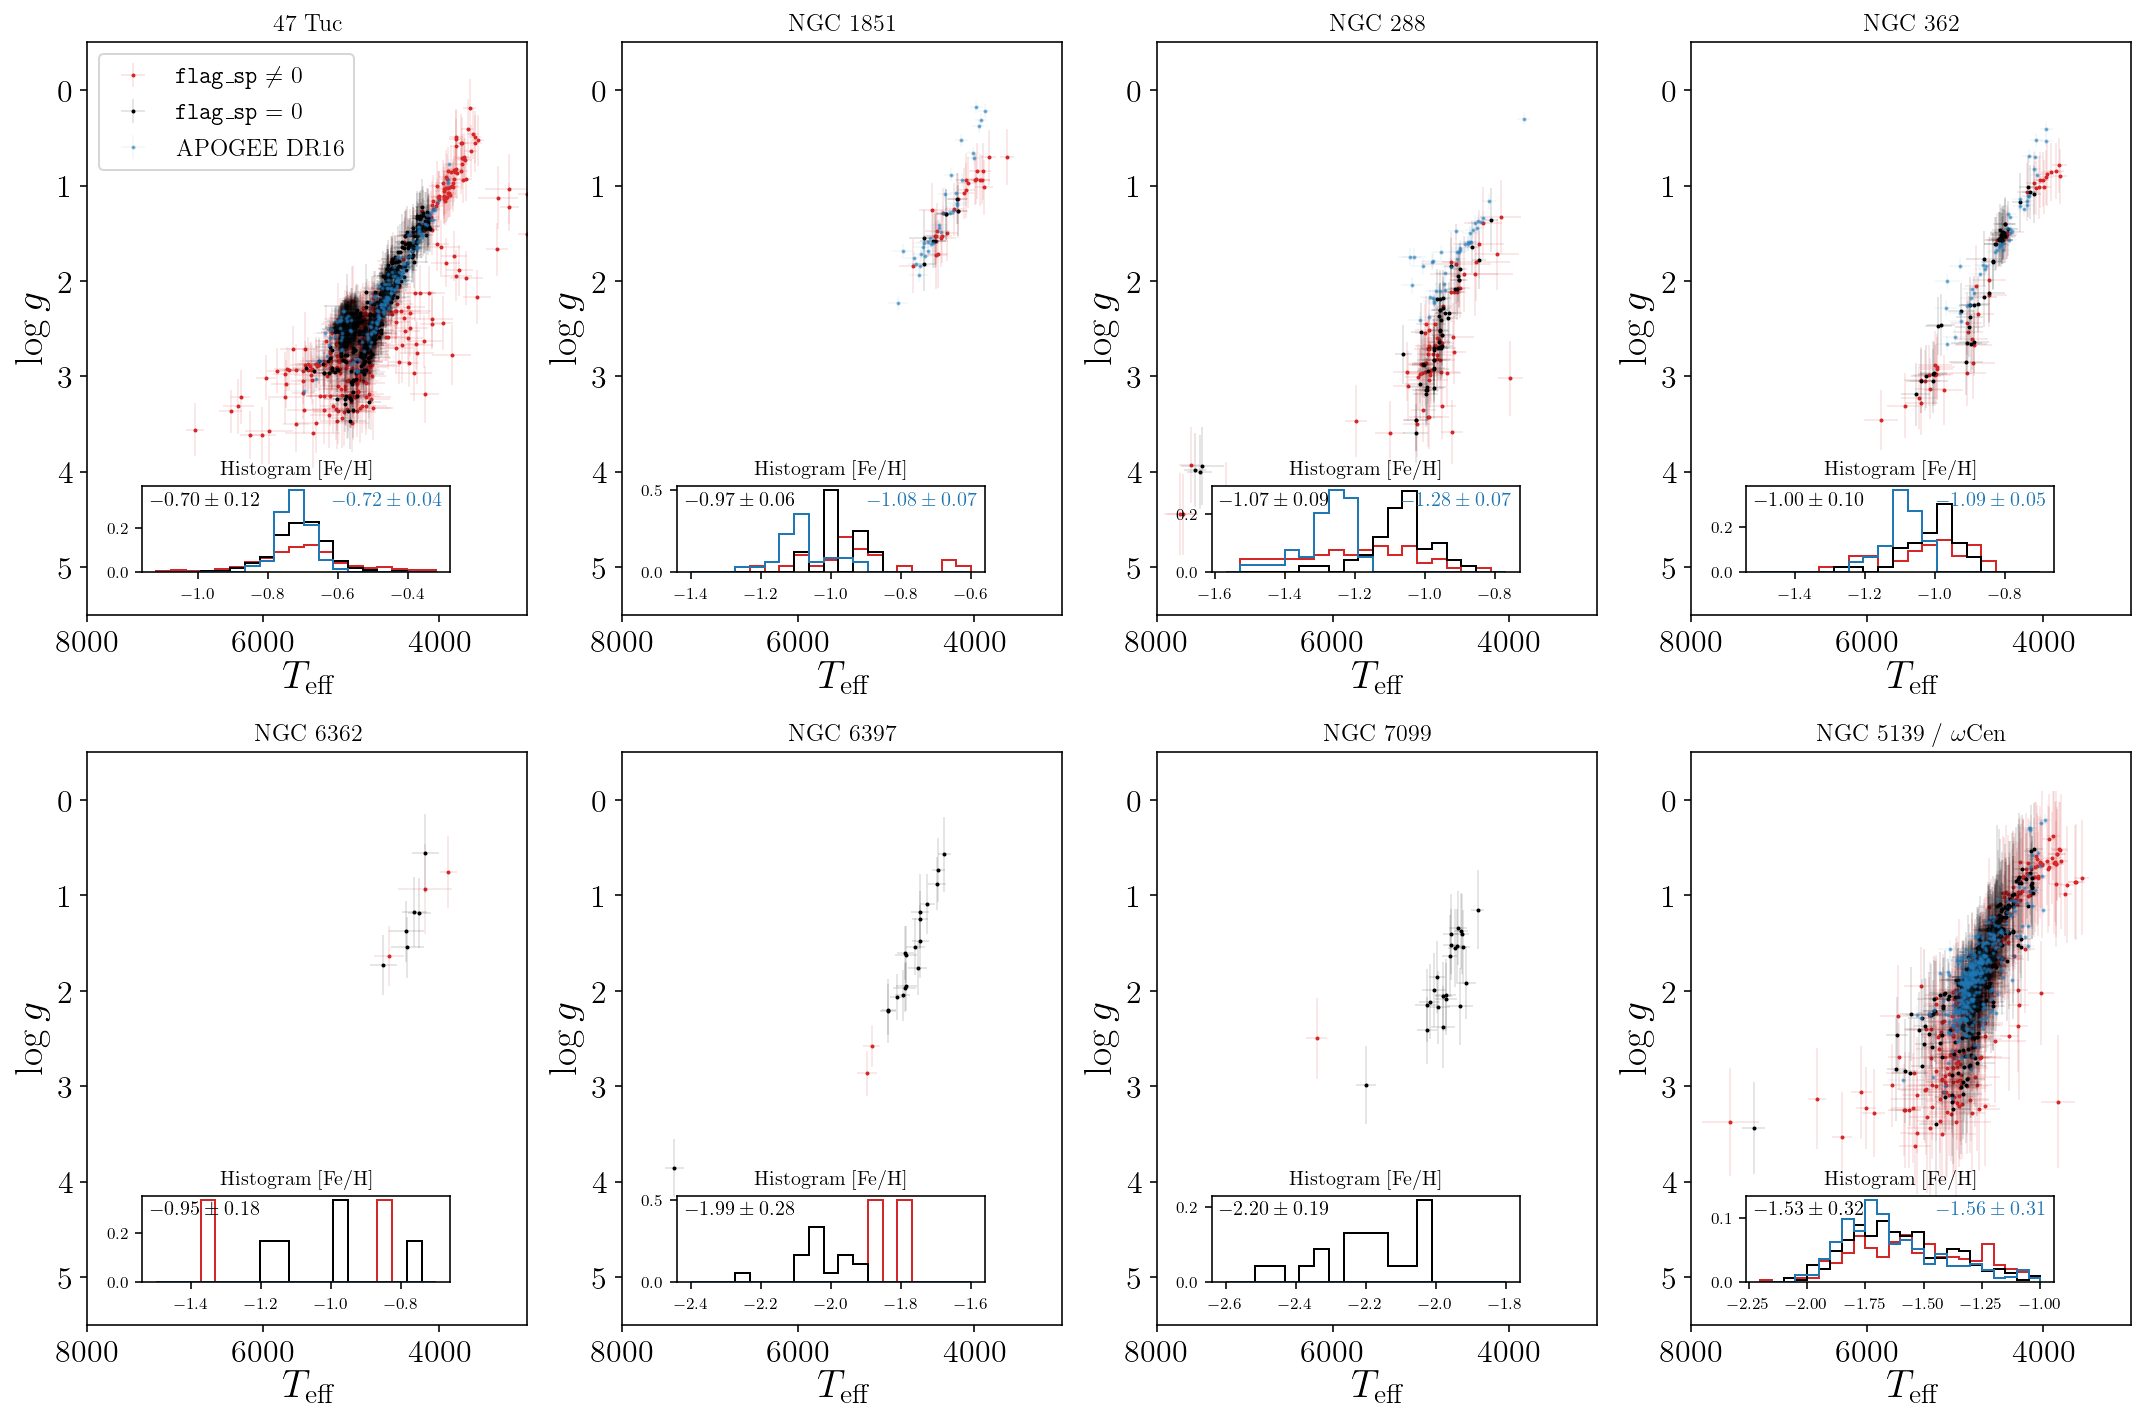

In [16]:
def cluster_kiel_all(flag_sp_cut=0):
    
    f, gs = plt.subplots(2,4,figsize=(15,10))
    
    for ax_id, cluster_short_name in enumerate(globular_clusters['name']):
        
        if ax_id > 3:
            ax = gs[1,ax_id-4]
        else:
            ax = gs[0,ax_id]
        
        cluster_id = np.where(cluster_short_name == globular_clusters['name'])[0][0]
        cluster_oid = globular_clusters['oid'][cluster_id]

        kwarfs_errorbar = dict(fmt='o',ms=1,lw=0.1)

        flag_0 = (dr3['flag_sp'][cluster_oid] <= flag_sp_cut) & (dr3['e_logg'][cluster_oid] < 1)
        flag_not_0 = (dr3['flag_sp'][cluster_oid] > flag_sp_cut) & (dr3['e_logg'][cluster_oid] < 1)
        flag_0_not_hotcool = flag_0 & (dr3['teff'][cluster_oid] <6500) & (dr3['teff'][cluster_oid] >4500)

        print(cluster_short_name,np.median(dr3['parallax_error'][cluster_oid][flag_0]/dr3['parallax'][cluster_oid][flag_0]))
        
        if cluster_short_name != 'NGC_5139':
            ax.set_title(cluster_short_name.replace('_',' '))
        else:
            ax.set_title(r'NGC 5139 / $\omega$Cen')

        ax.errorbar(
            dr3['teff'][cluster_oid][flag_not_0],
            dr3['logg'][cluster_oid][flag_not_0],
            xerr = dr3['e_teff'][cluster_oid][flag_not_0],
            yerr = dr3['e_logg'][cluster_oid][flag_not_0],
            c='C3',label=r'\texttt{flag\_sp} $\neq$ 0',
            zorder=2,
            **kwarfs_errorbar
        )

        ax.errorbar(
            dr3['teff'][cluster_oid][flag_0],
            dr3['logg'][cluster_oid][flag_0],
            xerr = dr3['e_teff'][cluster_oid][flag_0],
            yerr = dr3['e_logg'][cluster_oid][flag_0],
            c='k',label=r'\texttt{flag\_sp} = 0',
            zorder=3,
            **kwarfs_errorbar
        )
        
        if cluster_short_name=='47_Tuc':
            apo_s = apo_47tuc
            gc_feh = -0.72
        if cluster_short_name=='NGC_1851':
            apo_s = apo_ngc1851
            gc_feh = -1.0
        if cluster_short_name=='NGC_288':
            apo_s = apo_ngc288
            gc_feh = -1.17
        if cluster_short_name=='NGC_362':
            apo_s = apo_ngc362
            gc_feh = -1.1
        if cluster_short_name=='NGC_6362':
            apo_s = apo_ngc6362
            gc_feh = -1.1
        if cluster_short_name=='NGC_6397':
            apo_s = apo_ngc6397
            gc_feh = -2.0
        if cluster_short_name=='NGC_7099':
            apo_s = apo_ngc7099
            gc_feh = -2.2
        if cluster_short_name=='NGC_5139':
            apo_s = apo_ngc5139
            gc_feh = -1.7

        if cluster_short_name in ['47_Tuc','NGC_1851','NGC_6362','NGC_6397','NGC_288','NGC_362','NGC_7099','NGC_5139']:
            ax.errorbar(
                apo['TEFF'][apo_s],
                apo['LOGG'][apo_s],
                xerr = apo['TEFF_ERR'][apo_s],
                yerr = apo['LOGG_ERR'][apo_s],
                c='C0',label=r'APOGEE DR16',
                zorder=4,alpha=0.5,
                **kwarfs_errorbar
            )

        ax.set_xlim(8000,3000)
        ax.set_xlabel(r'$T_\text{eff}$')
        ax.set_ylim(5.5,-0.5)
        ax.set_ylabel(r'$\log g$')
        if ax_id==0:
            ax.legend(fontsize=12,loc='upper left')

    plt.tight_layout()

    for ax_id, cluster_short_name in enumerate(globular_clusters['name']):

        if ax_id > 3:
            ax = gs[1,ax_id-4]
        else:
            ax = gs[0,ax_id]
        
        cluster_id = np.where(cluster_short_name == globular_clusters['name'])[0][0]
        cluster_oid = globular_clusters['oid'][cluster_id]

        flag_0 = (dr3['flag_sp'][cluster_oid] <= flag_sp_cut) & (dr3['e_logg'][cluster_oid] < 1)
        flag_not_0 = (dr3['flag_sp'][cluster_oid] > flag_sp_cut) & (dr3['e_logg'][cluster_oid] < 1)
        flag_0_not_hotcool = flag_0 & (dr3['teff'][cluster_oid] <6500) & (dr3['teff'][cluster_oid] >4500)

        subpos = [0.125,0.075,0.7,0.15]
        box = ax.get_position()
        width = box.width
        height = box.height
        inax_position  = ax.transAxes.transform(subpos[0:2])
        transFigure = f.transFigure.inverted()
        infig_position = transFigure.transform(inax_position)    
        x = infig_position[0]
        y = infig_position[1]
        width *= subpos[2]
        height *= subpos[3]  # <= Typo was here
        subax = f.add_axes([x,y,width,height])
        subax.xaxis.set_tick_params(labelsize=8)
        subax.yaxis.set_tick_params(labelsize=8)
        
        if cluster_short_name=='47_Tuc':
            apo_s = apo_47tuc
            gc_feh = -0.72
        if cluster_short_name=='NGC_1851':
            apo_s = apo_ngc1851
            gc_feh = -1.0
        if cluster_short_name=='NGC_288':
            apo_s = apo_ngc288
            gc_feh = -1.17
        if cluster_short_name=='NGC_362':
            apo_s = apo_ngc362
            gc_feh = -1.1
        if cluster_short_name=='NGC_6362':
            apo_s = apo_ngc6362
            gc_feh = -1.1
        if cluster_short_name=='NGC_6397':
            apo_s = apo_ngc6397
            gc_feh = -2.0
        if cluster_short_name=='NGC_7099':
            apo_s = apo_ngc7099
            gc_feh = -2.2
        if cluster_short_name=='NGC_5139':
            apo_s = apo_ngc5139
            gc_feh = -1.7
        
        if cluster_short_name == 'NGC_5139':
            kwargs_hist = dict(histtype='step',lw=1,bins=np.linspace(-2.2,-1.0,25))
        else:
            kwargs_hist = dict(histtype='step',lw=1,bins=np.linspace(gc_feh-0.4,gc_feh+0.4,20))
            
        feh_1 = dr3['fe_h'][cluster_oid][flag_not_0]
        weights_1 = np.ones_like(feh_1)/float(len(feh_1))
        subax.hist(feh_1, weights=weights_1,
            color='C3',**kwargs_hist
        )
        feh_2 = dr3['fe_h'][cluster_oid][flag_0]
        weights_2 = np.ones_like(feh_2)/float(len(feh_2))
        subax.hist(feh_2, weights=weights_2,
            color='k',**kwargs_hist
        )
        feh_3 = apo['FE_H'][apo_s]
        weights_3 = np.ones_like(feh_3)/float(len(feh_3))
        subax.hist(feh_3, weights=weights_3,
            color='C0',**kwargs_hist
        )
        mean = np.mean(feh_2)
        std = np.std(feh_2)
        stde = np.std(feh_2)/np.sqrt(len(feh_2))
        print(cluster_short_name)
        print("{:.2f}".format(mean)+'\pm'+"{:.2f}".format(std)+'\pm'+"{:.2f}".format(stde))

        subax.set_title('Histogram [Fe/H]',fontsize=10)
        subax.text(0.025,0.8,r'$'+"{:.2f}".format(np.mean(feh_2))+'\pm'+"{:.2f}".format(np.std(feh_2))+'$',c='k',transform=subax.transAxes,fontsize=10)
        if len(feh_3) > 1:
            subax.text(0.975,0.8,r'$'+"{:.2f}".format(np.mean(feh_3))+'\pm'+"{:.2f}".format(np.std(feh_3))+'$',c='C0',transform=subax.transAxes,ha='right',fontsize=10)

    #plt.savefig('../../../dr3_release_paper/figures/gc_kiel_diagrams.png',bbox_inches='tight',dpi=200)
cluster_kiel_all()

In [11]:
def analyse_cluster(cluster_short_name, flag_sp_cut = 0):

    cluster_id = np.where(cluster_short_name == globular_clusters['name'])[0][0]
    cluster_oid = globular_clusters['oid'][cluster_id]
        
    f, gs = plt.subplots(1,3,figsize=(15,5))
    
    kwarfs_errorbar = dict(fmt='o',ms=1,lw=0.1)
    
    for ax_id, ax in enumerate(gs):
        
        flag_0 = (dr3['flag_sp'][cluster_oid] <= flag_sp_cut) & (dr3['e_logg'][cluster_oid] < 1)
        flag_not_0 = (dr3['flag_sp'][cluster_oid] > flag_sp_cut) & (dr3['e_logg'][cluster_oid] < 1)
        flag_0_not_hotcool = flag_0 & (dr3['teff'][cluster_oid] <6500) & (dr3['teff'][cluster_oid] >4500)
        
        if ax_id == 0:
            
            ax.set_title(cluster_short_name.replace('_',' '))

            ax.errorbar(
                dr3['teff'][cluster_oid][flag_not_0],
                dr3['logg'][cluster_oid][flag_not_0],
                xerr = dr3['e_teff'][cluster_oid][flag_not_0],
                yerr = dr3['e_logg'][cluster_oid][flag_not_0],
                c='C3',label=r'GALAH DR3 \texttt{flag\_sp} $\neq$ 0',
                zorder=2,
                **kwarfs_errorbar
            )
            
            ax.errorbar(
                dr3['teff'][cluster_oid][flag_0],
                dr3['logg'][cluster_oid][flag_0],
                xerr = dr3['e_teff'][cluster_oid][flag_0],
                yerr = dr3['e_logg'][cluster_oid][flag_0],
                c='k',label=r'GALAH DR3 \texttt{flag\_sp}=0',
                zorder=3,
                **kwarfs_errorbar
            )
            
            ax.set_xlim(8000,3000)
            ax.set_xlabel(r'$T_\text{eff}$')
            ax.set_ylim(5.5,-0.5)
            ax.set_ylabel(r'$\log g$')
            ax.legend(fontsize=12,loc='upper left')

        if ax_id == 1:
            
            ax.set_title(cluster_short_name.replace('_',' '))

            mean = np.mean(dr3['fe_h'][cluster_oid][flag_0_not_hotcool])
            std = np.std(dr3['fe_h'][cluster_oid][flag_0_not_hotcool])
            
            ax.axhspan(
                mean-std,
                mean+std,
                facecolor='grey',alpha=0.25,
                label='Mean'
            )
            ax.axhline(
                mean,
                c='k'
            )
            ax.axvline(4500,c='k',ls='dashed')
            ax.axvline(6500,c='k',ls='dashed')
            props = dict(boxstyle='round', facecolor='w', edgecolor = 'w', alpha=0.95,zorder=5)
            if cluster_short_name in ['NGC_2516','Ruprecht_147','Melotte_22','Blanco_1','NGC_2548']:
                ax.text(0.5,0.05,r'GALAH DR3 [Fe/H]: $'+"{:.2f}".format(mean)+'\pm'+"{:.2f}".format(std)+'$',transform=ax.transAxes,ha='center',fontsize=15,bbox=props)
            else:
                ax.text(0.5,0.925,r'GALAH DR3 [Fe/H]: $'+"{:.2f}".format(mean)+'\pm'+"{:.2f}".format(std)+'$',transform=ax.transAxes,ha='center',fontsize=15,bbox=props)
                
            ax.errorbar(
                dr3['teff'][cluster_oid][flag_not_0],
                dr3['fe_h'][cluster_oid][flag_not_0],
                xerr = dr3['e_teff'][cluster_oid][flag_not_0],
                yerr = dr3['e_fe_h'][cluster_oid][flag_not_0],
                c='C3',label=r'GALAH DR3 \texttt{flag\_sp} $\neq$ 0',
                zorder=2,
                **kwarfs_errorbar
            )
            
            ax.errorbar(
                dr3['teff'][cluster_oid][flag_0],
                dr3['fe_h'][cluster_oid][flag_0],
                xerr = dr3['e_teff'][cluster_oid][flag_0],
                yerr = dr3['e_fe_h'][cluster_oid][flag_0],
                c='k',label=r'GALAH DR3 \texttt{flag\_sp}=0',
                zorder=3,
                **kwarfs_errorbar
            )
            ax.invert_xaxis()
            ax.set_xlabel(r'$T_\text{eff}$')
            ax.set_ylabel(r'[Fe/H]')
            #ax.legend(fontsize=12)
            if cluster_short_name=='47_Tuc':
                ax.set_ylim(-1.5,1)

        if ax_id == 2:
            
            ax.set_title(cluster_short_name.replace('_',' '))

            mean = np.mean(dr3['fe_h'][cluster_oid][flag_0_not_hotcool])
            std = np.std(dr3['fe_h'][cluster_oid][flag_0_not_hotcool])
            
            ax.axhspan(
                mean-std,
                mean+std,
                facecolor='grey',alpha=0.25,
                label='Mean'
            )
            ax.axhline(
                mean,
                c='k'
            )
            props = dict(boxstyle='round', facecolor='w', edgecolor = 'w', alpha=0.95,zorder=5)
            if cluster_short_name in ['NGC_2516','Ruprecht_147','Melotte_22','Blanco_1','NGC_2548']:
                ax.text(0.5,0.05,r'GALAH DR3 [Fe/H]: $'+"{:.2f}".format(mean)+'\pm'+"{:.2f}".format(std)+'$',transform=ax.transAxes,ha='center',fontsize=15,bbox=props)
            else:
                ax.text(0.5,0.925,r'GALAH DR3 [Fe/H]: $'+"{:.2f}".format(mean)+'\pm'+"{:.2f}".format(std)+'$',transform=ax.transAxes,ha='center',fontsize=15,bbox=props)
                
            ax.errorbar(
                dr3['logg'][cluster_oid][flag_not_0],
                dr3['fe_h'][cluster_oid][flag_not_0],
                xerr = dr3['e_logg'][cluster_oid][flag_not_0],
                yerr = dr3['e_fe_h'][cluster_oid][flag_not_0],
                c='C3',label=r'GALAH DR3 \texttt{flag\_sp} $\neq$ 0',
                zorder=2,
                **kwarfs_errorbar
            )
            ax.errorbar(
                dr3['logg'][cluster_oid][flag_0],
                dr3['fe_h'][cluster_oid][flag_0],
                xerr = dr3['e_logg'][cluster_oid][flag_0],
                yerr = dr3['e_fe_h'][cluster_oid][flag_0],
                c='k',label=r'GALAH DR3 \texttt{flag\_sp}=0',
                zorder=3,
                **kwarfs_errorbar
            )
            ax.invert_xaxis()
            ax.set_xlabel(r'$\log g$')
            ax.set_ylabel(r'[Fe/H]')
            #ax.legend(fontsize=12)
            
            if cluster_short_name=='47_Tuc':
                ax.set_ylim(-1.5,1)
            
    plt.tight_layout(w_pad=0,h_pad=0)
    
    plt.savefig('../../../dr3_release_paper/figures/gc_'+cluster_short_name+'.png',dpi=200,bbox_inches='tight')

NB: Mean [Fe/H] only based on stars with 4500 < Teff < 6500 (indicated by dashed line)


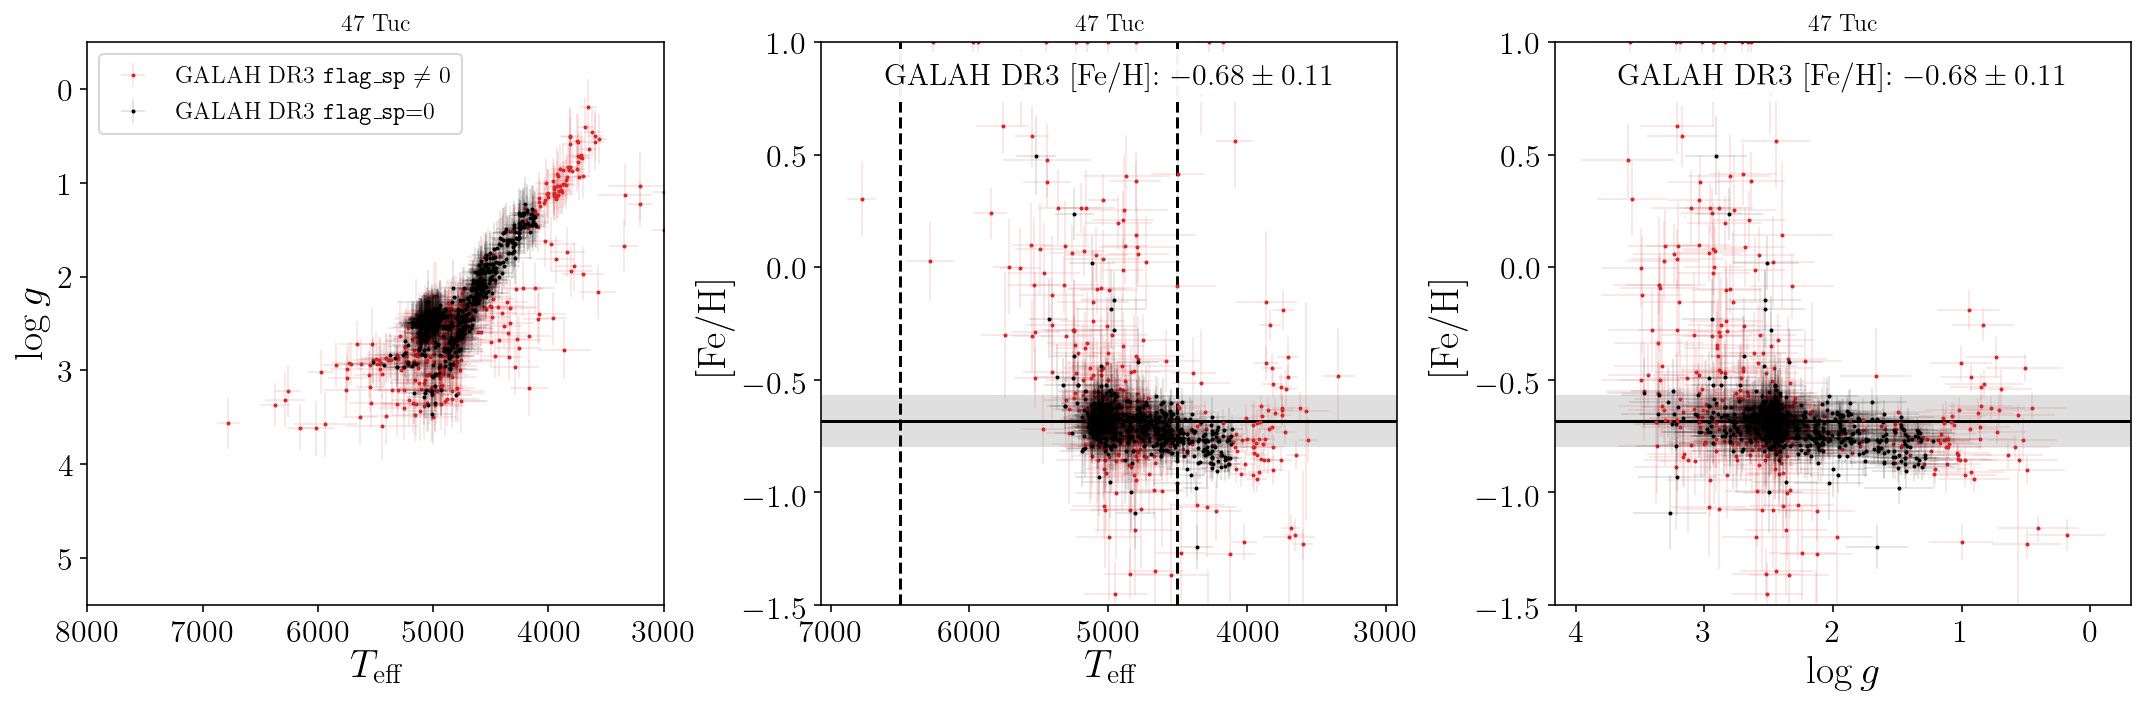

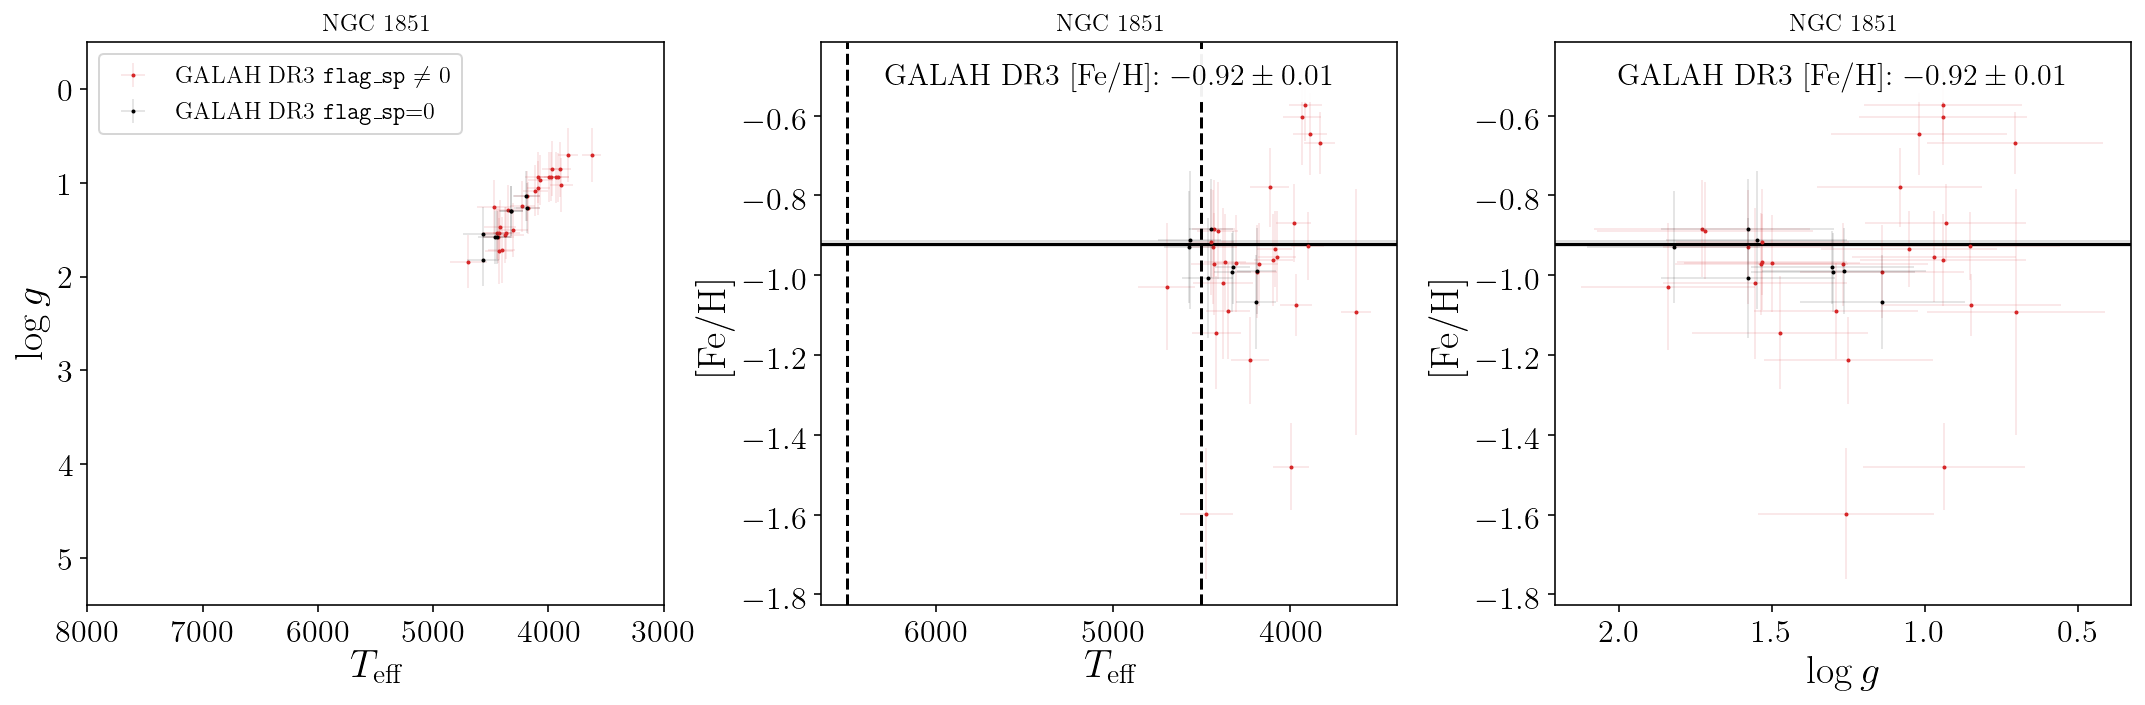

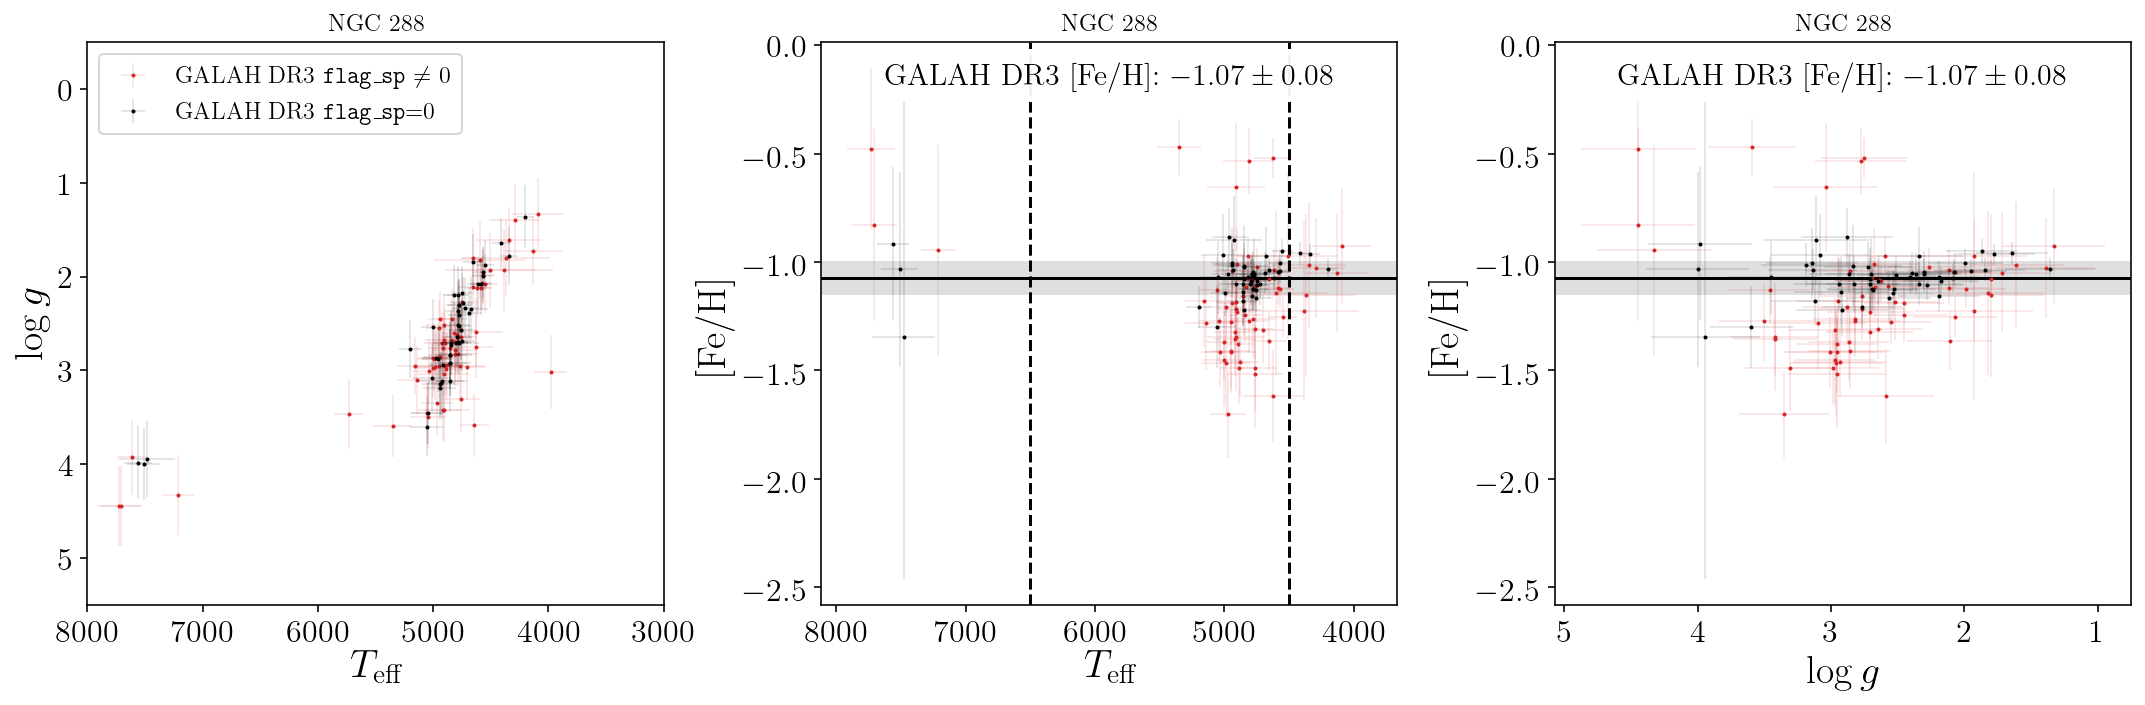

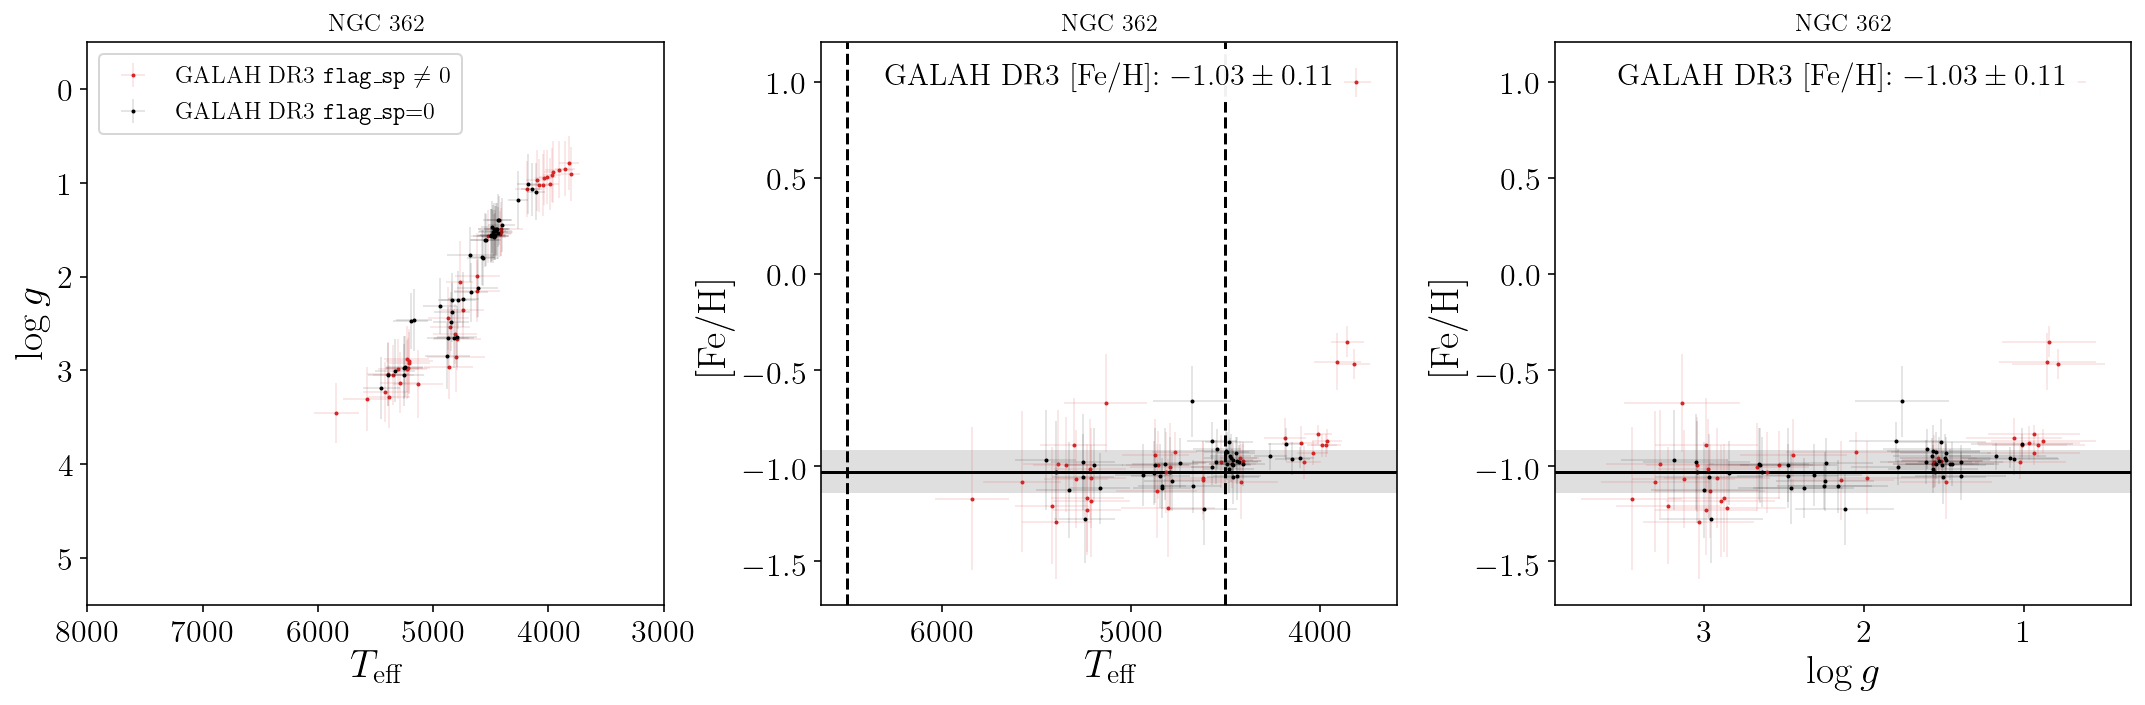

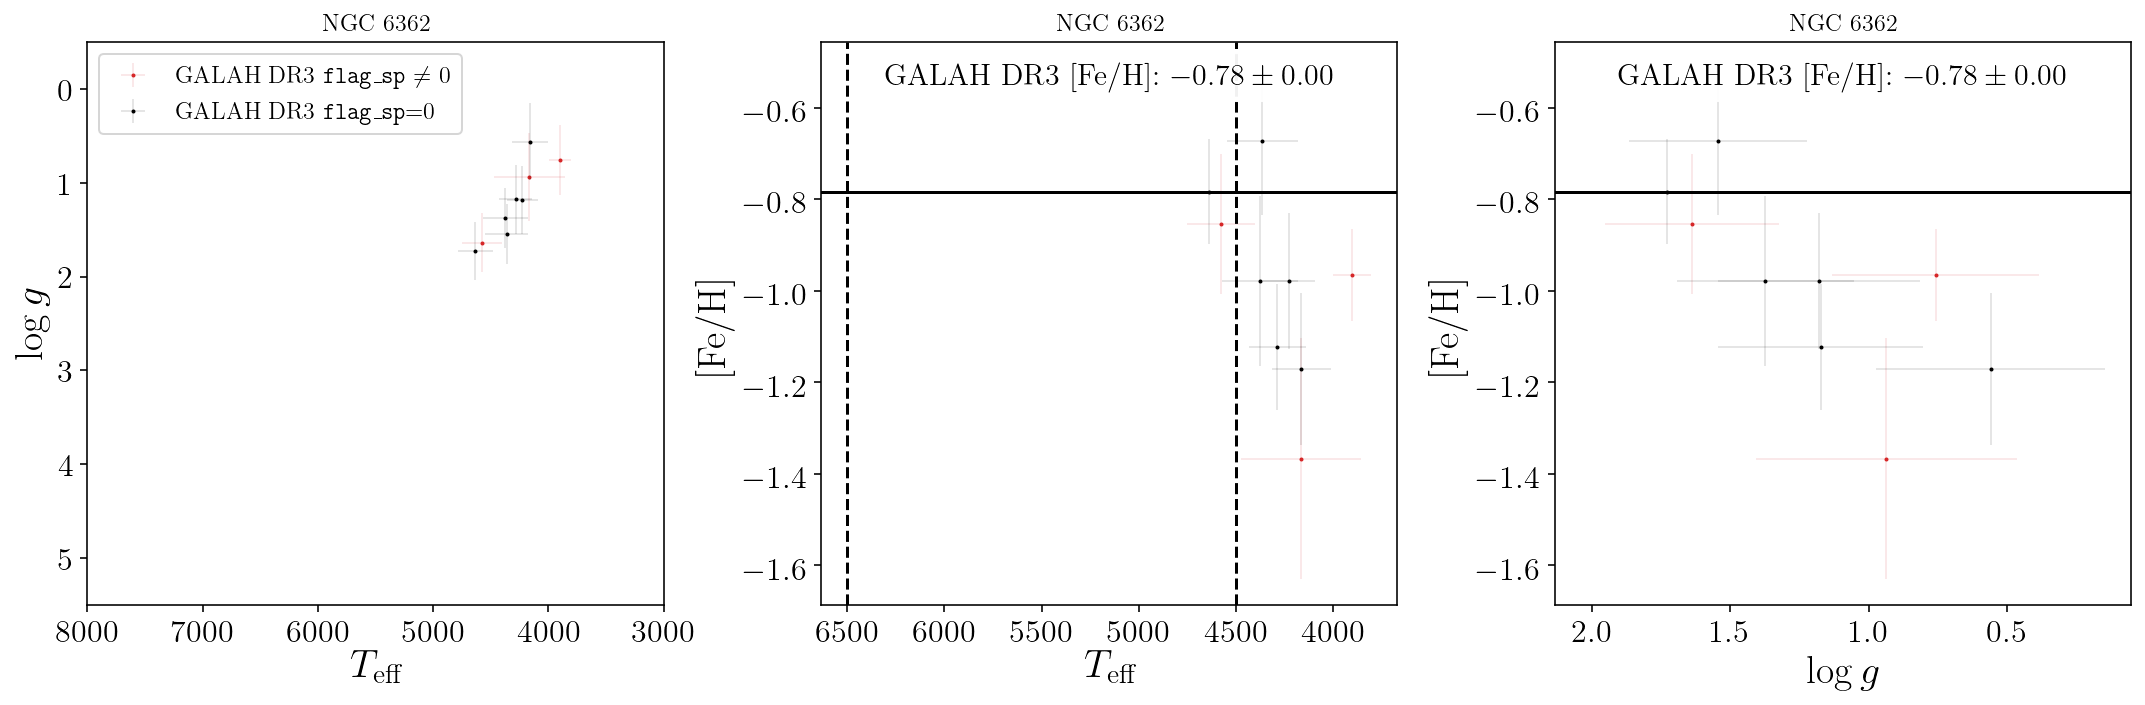

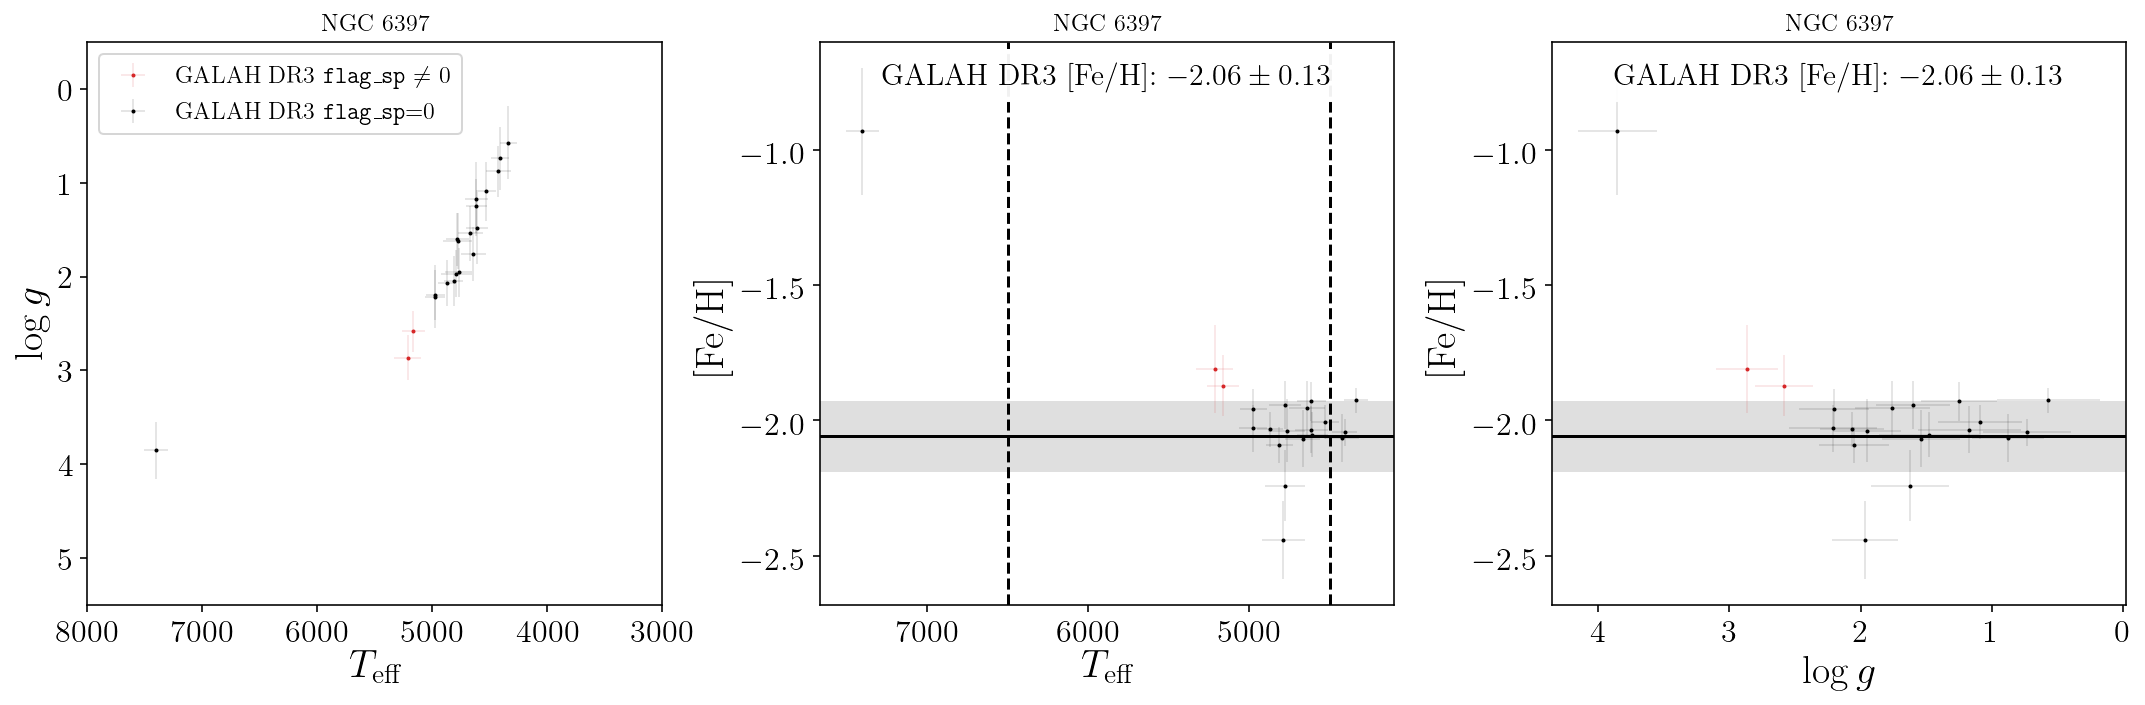

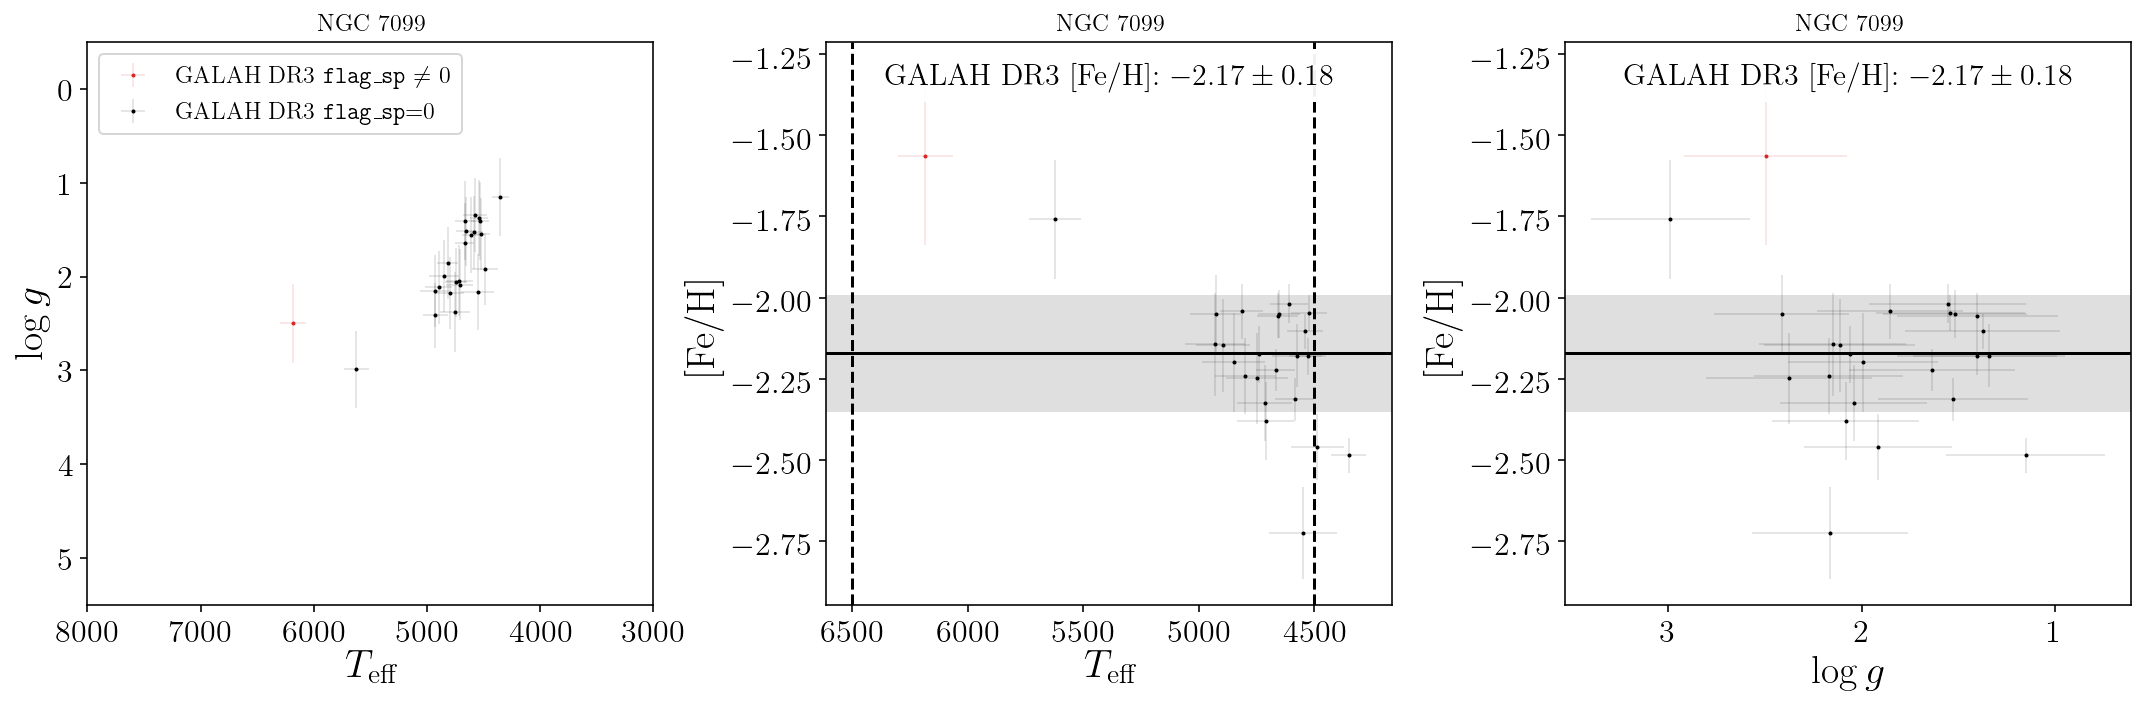

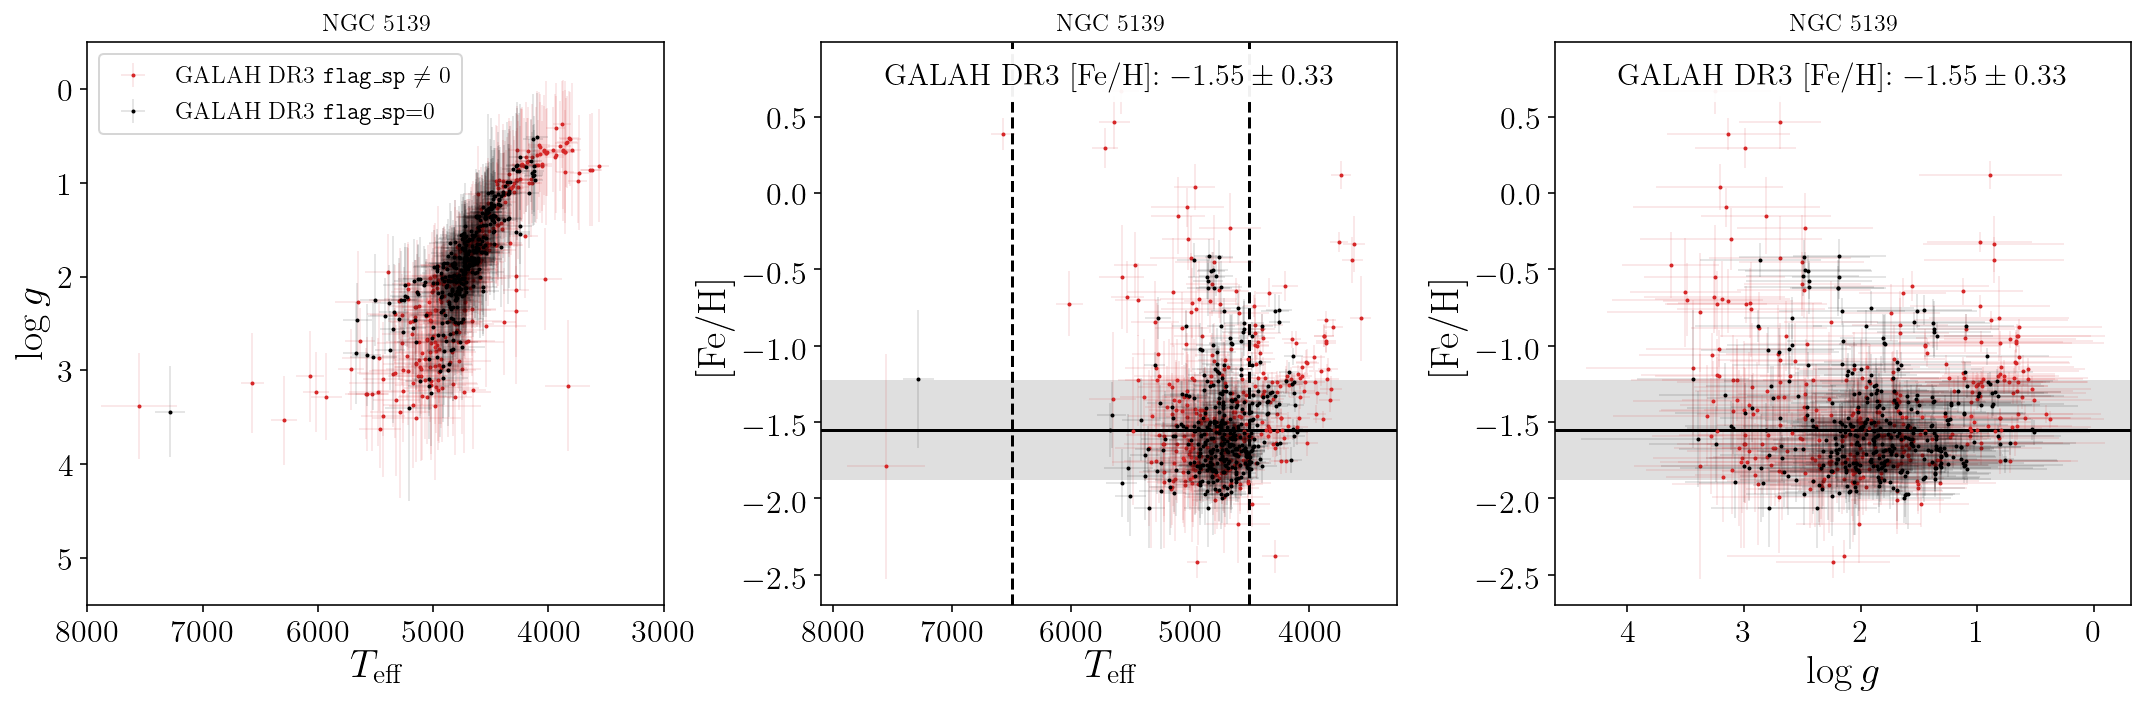

In [12]:
print("NB: Mean [Fe/H] only based on stars with 4500 < Teff < 6500 (indicated by dashed line)")

for cluster in globular_clusters['name']:

    analyse_cluster(cluster_short_name = cluster)

In [13]:
def analyse_cluster_anticorrelations(cluster_short_name, flag_sp_cut = 0, flag_ab_cut = 0, s_proess_division=True, plot_flagged=True):

    cluster_id = np.where(cluster_short_name == globular_clusters['name'])[0][0]
    cluster_oid = globular_clusters['oid'][cluster_id]
        
    f, gs = plt.subplots(1,3,figsize=(15,5))
    
    kwarfs_errorbar = dict(fmt='o',ms=2,lw=0.2,alpha=0.5)
    
    for ax_id, ax in enumerate(gs):
        
        if ax_id == 0:
            xelem = 'O'
            yelem = 'Na'
        if ax_id == 1:
            xelem = 'Mg'
            yelem = 'Al'
        if ax_id == 2:
            xelem = 'Eu'
            yelem = 'Ba'

        flag_0 = (dr3['flag_sp'][cluster_oid] <= flag_sp_cut) & (dr3['e_logg'][cluster_oid] < 1) & (dr3['flag_'+xelem+'_fe'][cluster_oid] <= flag_ab_cut) & (dr3['flag_'+yelem+'_fe'][cluster_oid] <= flag_ab_cut) & np.isfinite(dr3[xelem+'_fe'][cluster_oid]) & np.isfinite(dr3[yelem+'_fe'][cluster_oid])
        flag_0_high_s = (dr3['flag_sp'][cluster_oid] <= flag_sp_cut) & (dr3['e_logg'][cluster_oid] < 1) & (dr3['flag_'+xelem+'_fe'][cluster_oid] <= flag_ab_cut) & (dr3['flag_'+yelem+'_fe'][cluster_oid] <= flag_ab_cut) & np.isfinite(dr3[xelem+'_fe'][cluster_oid]) & np.isfinite(dr3[yelem+'_fe'][cluster_oid]) & (dr3['Na_fe'][cluster_oid] > 0.5-0.3*dr3['O_fe'][cluster_oid]) & (dr3['flag_Na_fe'][cluster_oid] <= 1)
        flag_0_low_s = (dr3['flag_sp'][cluster_oid] <= flag_sp_cut) & (dr3['e_logg'][cluster_oid] < 1) & (dr3['flag_'+xelem+'_fe'][cluster_oid] <= flag_ab_cut) & (dr3['flag_'+yelem+'_fe'][cluster_oid] <= flag_ab_cut) & np.isfinite(dr3[xelem+'_fe'][cluster_oid]) & np.isfinite(dr3[yelem+'_fe'][cluster_oid]) & (dr3['Na_fe'][cluster_oid] <= 0.5-0.3*dr3['O_fe'][cluster_oid]) & (dr3['flag_Na_fe'][cluster_oid] <= 1)
        #flag_0_high_s = (dr3['flag_sp'][cluster_oid] <= flag_sp_cut) & (dr3['e_logg'][cluster_oid] < 1) & (dr3['flag_'+xelem+'_fe'][cluster_oid] <= flag_ab_cut) & (dr3['flag_'+yelem+'_fe'][cluster_oid] <= flag_ab_cut) & np.isfinite(dr3[xelem+'_fe'][cluster_oid]) & np.isfinite(dr3[yelem+'_fe'][cluster_oid]) & (((dr3['La_fe'][cluster_oid] > 0.4) & (dr3['flag_La_fe'][cluster_oid] <= 0)) | ((dr3['Ba_fe'][cluster_oid] > 0.5) & (dr3['flag_Ba_fe'][cluster_oid] <= 0)))
        #flag_0_low_s = (dr3['flag_sp'][cluster_oid] <= flag_sp_cut) & (dr3['e_logg'][cluster_oid] < 1) & (dr3['flag_'+xelem+'_fe'][cluster_oid] <= flag_ab_cut) & (dr3['flag_'+yelem+'_fe'][cluster_oid] <= flag_ab_cut) & np.isfinite(dr3[xelem+'_fe'][cluster_oid]) & np.isfinite(dr3[yelem+'_fe'][cluster_oid]) & (~flag_0_high_s)
        flag_not_0 = (dr3['flag_sp'][cluster_oid] > flag_sp_cut) & (dr3['e_logg'][cluster_oid] < 1) & (dr3['flag_'+xelem+'_fe'][cluster_oid] <= 1)  & (dr3['flag_'+yelem+'_fe'][cluster_oid] <= 1) & np.isfinite(dr3[xelem+'_fe'][cluster_oid]) & np.isfinite(dr3[yelem+'_fe'][cluster_oid])
        flag_0_not_hotcool = flag_0 & (dr3['teff'][cluster_oid] <6500) & (dr3['teff'][cluster_oid] >4500)
        
        if ax_id in [0,1,2]:

            ax.set_title(cluster_short_name.replace('_',' ')+' '+xelem+'/'+yelem)

            if plot_flagged:
                ax.errorbar(
                    dr3[xelem+'_fe'][cluster_oid][flag_not_0],
                    dr3[yelem+'_fe'][cluster_oid][flag_not_0],
                    xerr = dr3['e_'+xelem+'_fe'][cluster_oid][flag_not_0],
                    yerr = dr3['e_'+yelem+'_fe'][cluster_oid][flag_not_0],
                    c='C3',label=r'GALAH DR3 \texttt{flag\_X\_fe} $\leq$ 1',
                    zorder=2,
                    **kwarfs_errorbar
                )

            if s_proess_division:
                ax.errorbar(
                    dr3[xelem+'_fe'][cluster_oid][flag_0_high_s],
                    dr3[yelem+'_fe'][cluster_oid][flag_0_high_s],
                    xerr = dr3['e_'+xelem+'_fe'][cluster_oid][flag_0_high_s],
                    yerr = dr3['e_'+yelem+'_fe'][cluster_oid][flag_0_high_s],
                    c='r',label=r'GALAH DR3 \texttt{flag\_X\_fe} $\leq$ '+str(flag_ab_cut)+', high [Na/Fe]',
                    zorder=3,
                    **kwarfs_errorbar
                )
                ax.errorbar(
                    dr3[xelem+'_fe'][cluster_oid][flag_0_low_s],
                    dr3[yelem+'_fe'][cluster_oid][flag_0_low_s],
                    xerr = dr3['e_'+xelem+'_fe'][cluster_oid][flag_0_low_s],
                    yerr = dr3['e_'+yelem+'_fe'][cluster_oid][flag_0_low_s],
                    c='b',label=r'GALAH DR3 \texttt{flag\_X\_fe} $\leq$ '+str(flag_ab_cut)+', low [Na/Fe]',
                    zorder=3,
                    **kwarfs_errorbar
                )
            else:
                ax.errorbar(
                    dr3[xelem+'_fe'][cluster_oid][flag_0],
                    dr3[yelem+'_fe'][cluster_oid][flag_0],
                    xerr = dr3['e_'+xelem+'_fe'][cluster_oid][flag_0],
                    yerr = dr3['e_'+yelem+'_fe'][cluster_oid][flag_0],
                    c='k',label=r'GALAH DR3 \texttt{flag\_X\_fe} $\leq$ '+str(flag_ab_cut),
                    zorder=3,
                    **kwarfs_errorbar
                )
            ax.set_xlabel(r'['+xelem+'/Fe]')
            ax.set_ylabel(r'['+yelem+'/Fe]')
            if ax_id == 0:
                ax.legend(fontsize=12)
                ax.set_xlim(-0.5,1.75)
                ax.set_ylim(-0.5,1.)
            if ax_id == 1:
                ax.set_xlim(-0.75,1.)
                ax.set_ylim(-0.5,1.75)
            if ax_id == 2:
                ax.set_xlim(-0.5,2.)
                ax.set_ylim(-0.5,2.)

    plt.tight_layout()
    
    plt.savefig('gc_abundance_comparison/gc_anitcorrelations_'+cluster_short_name+'.png',dpi=200,bbox_inches='tight')

NB: Mean [Fe/H] only based on stars with 4500 < Teff < 6500 (indicated by dashed line)


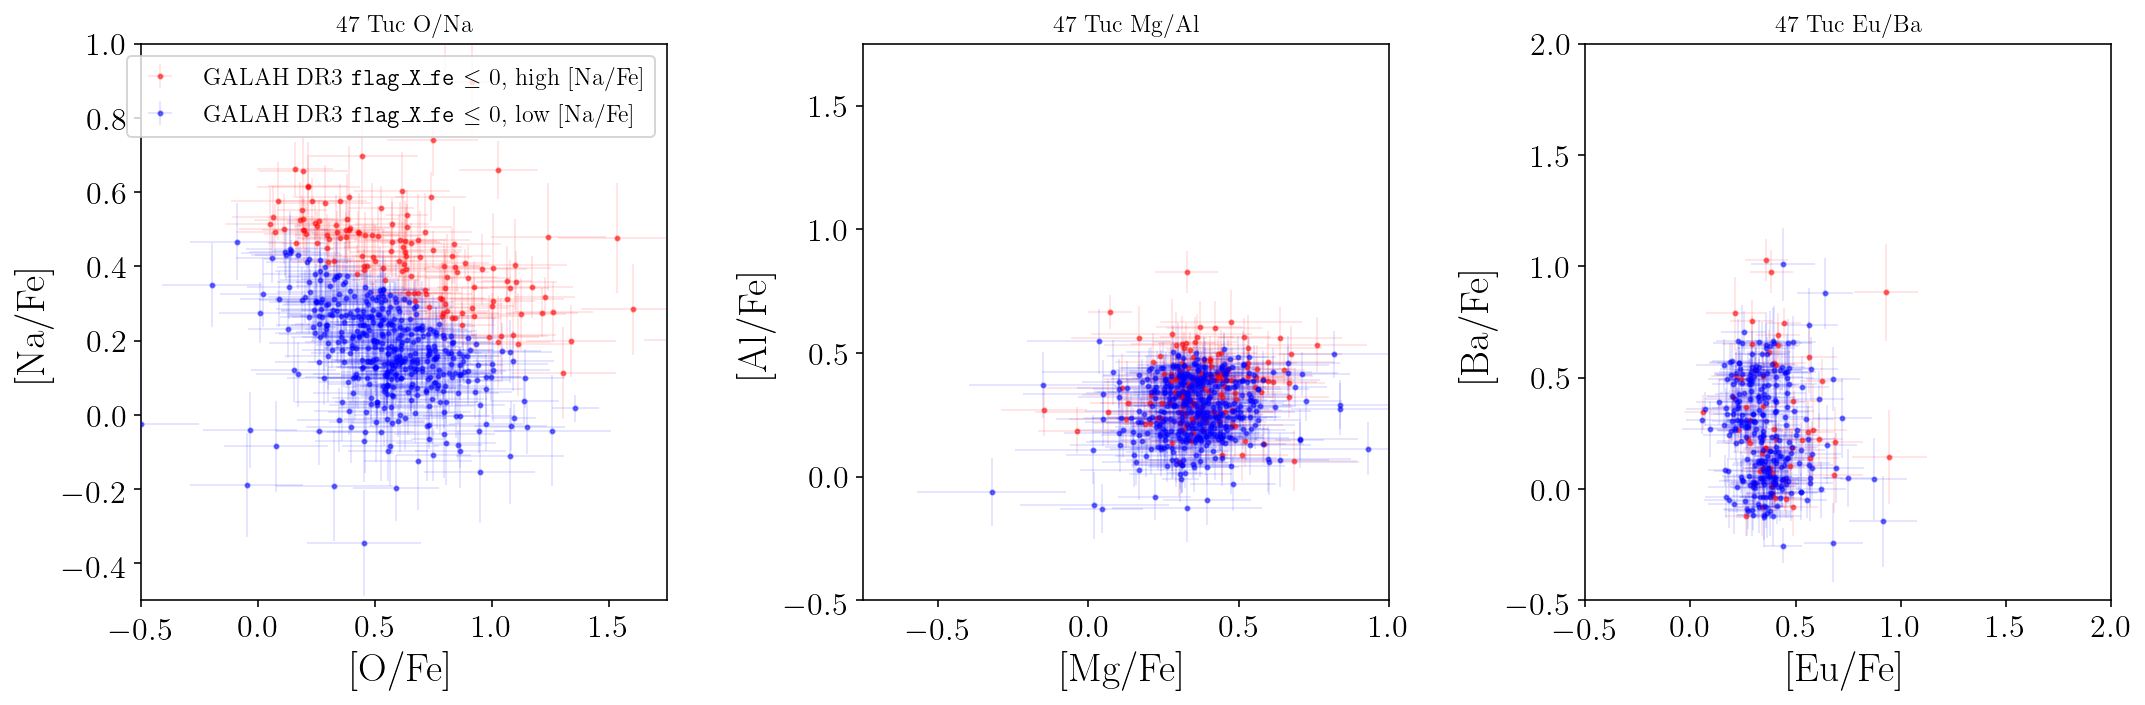

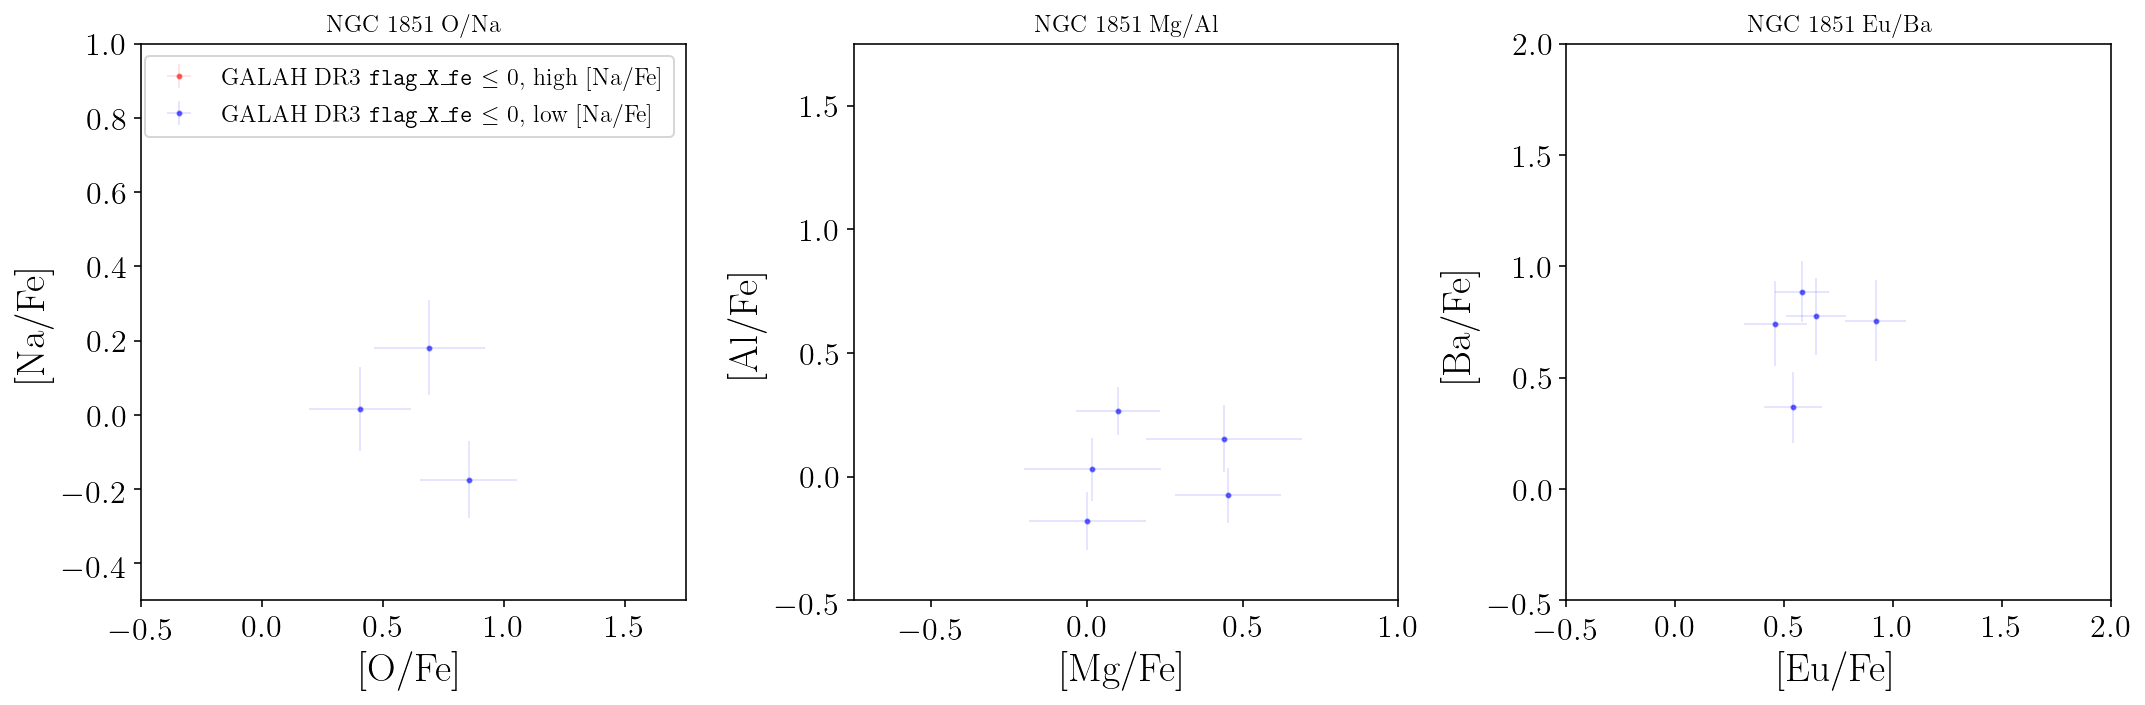

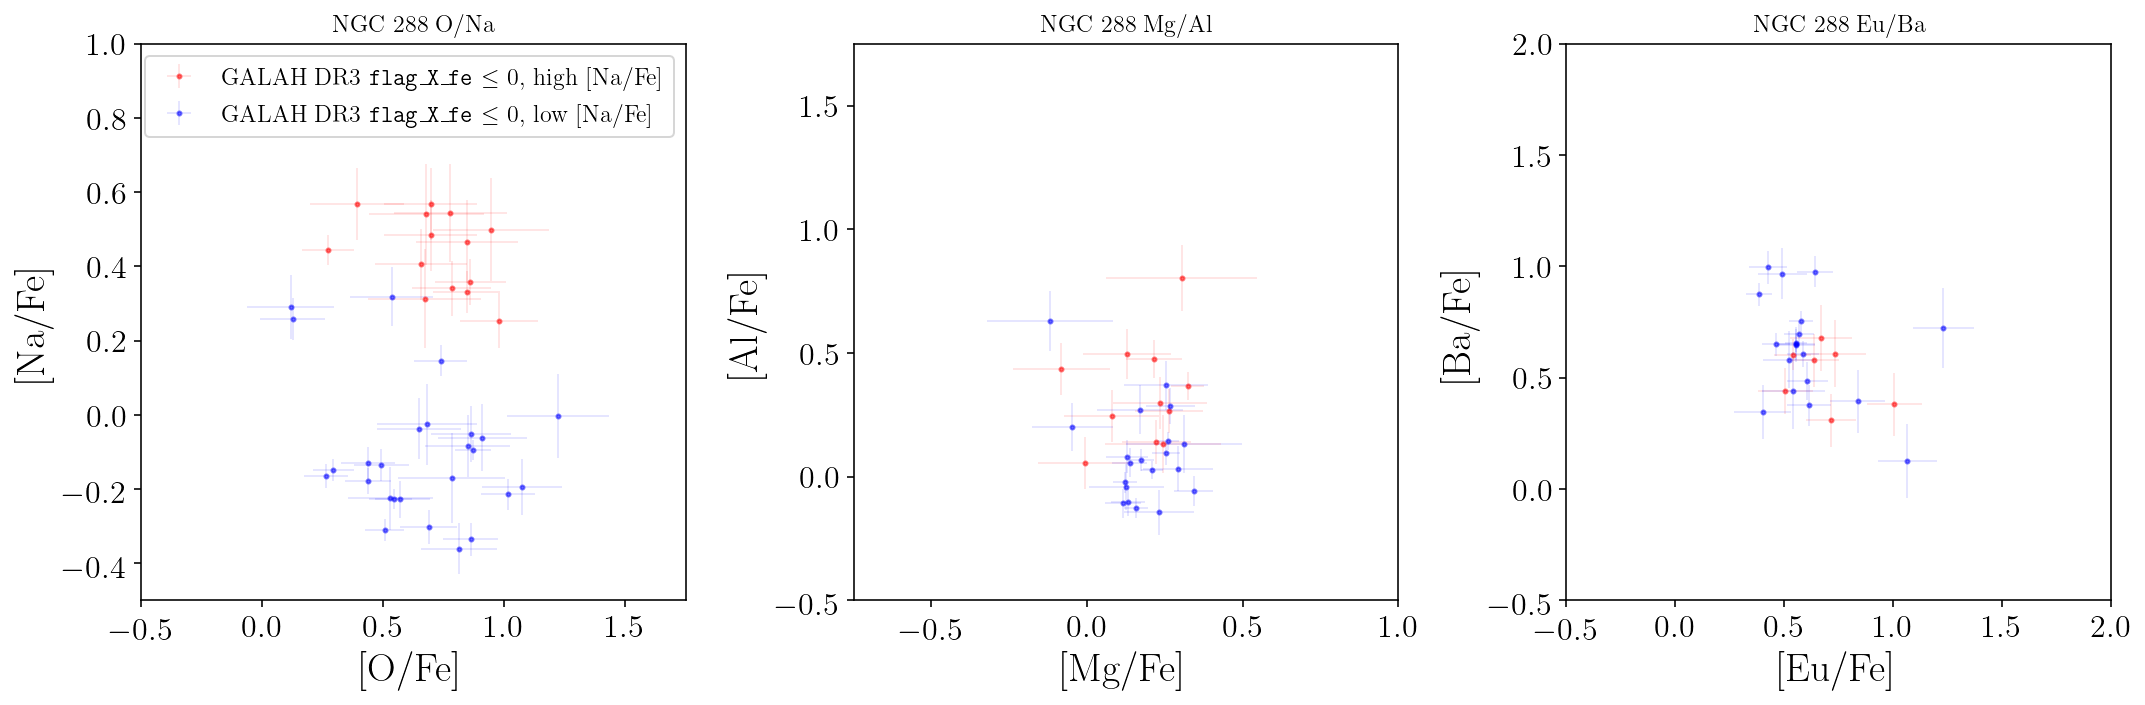

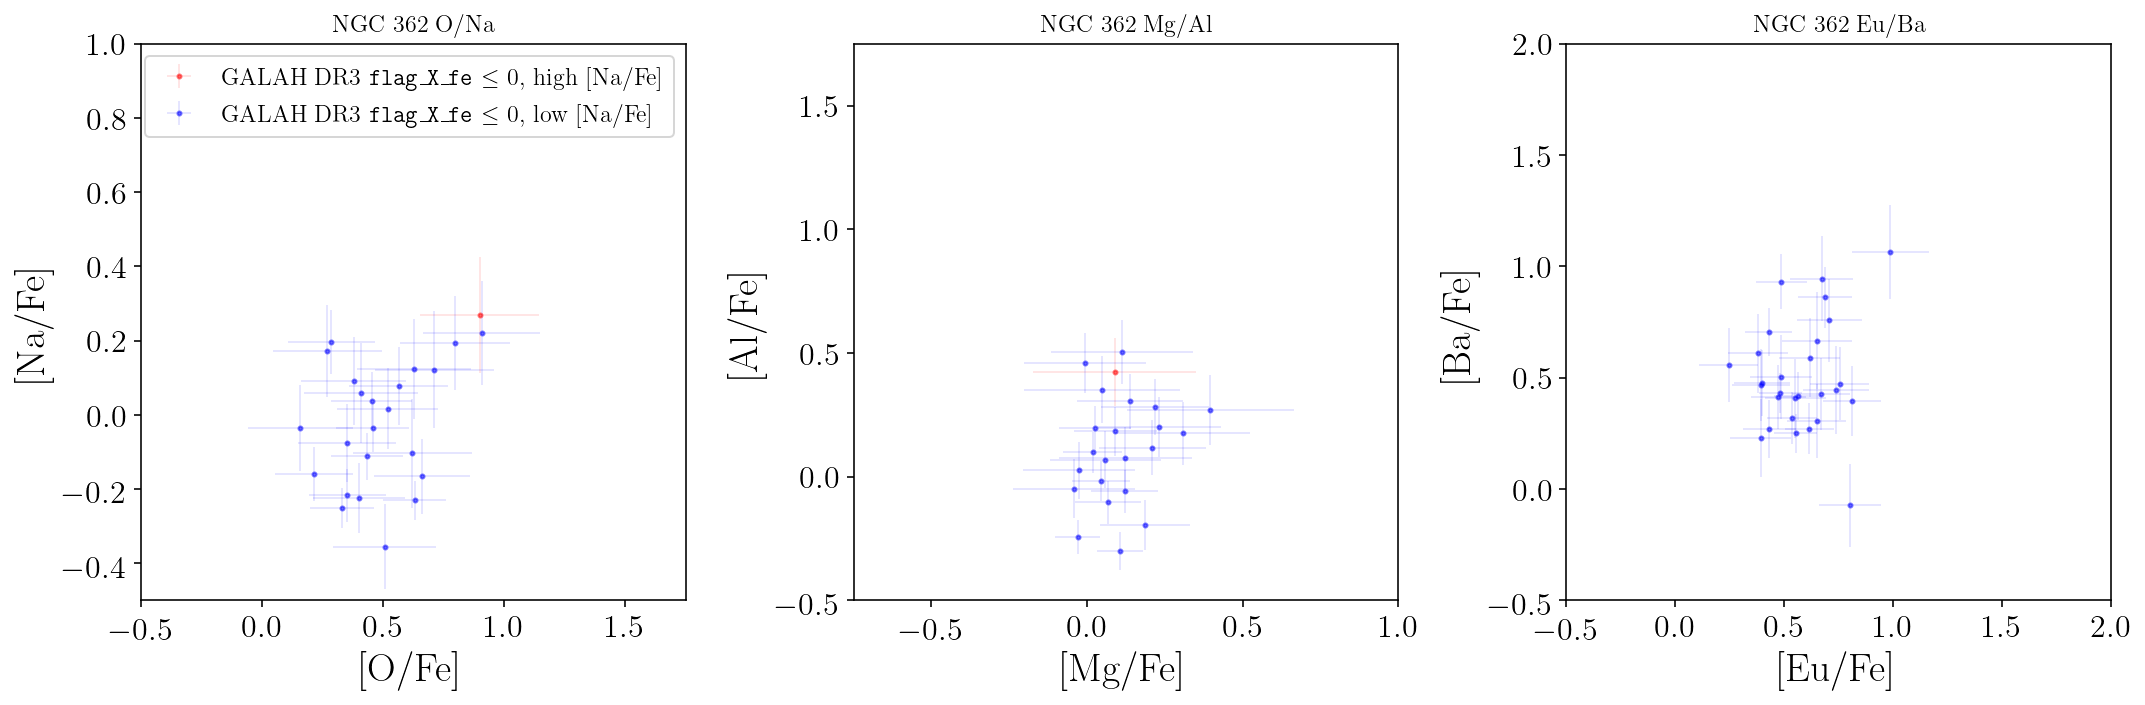

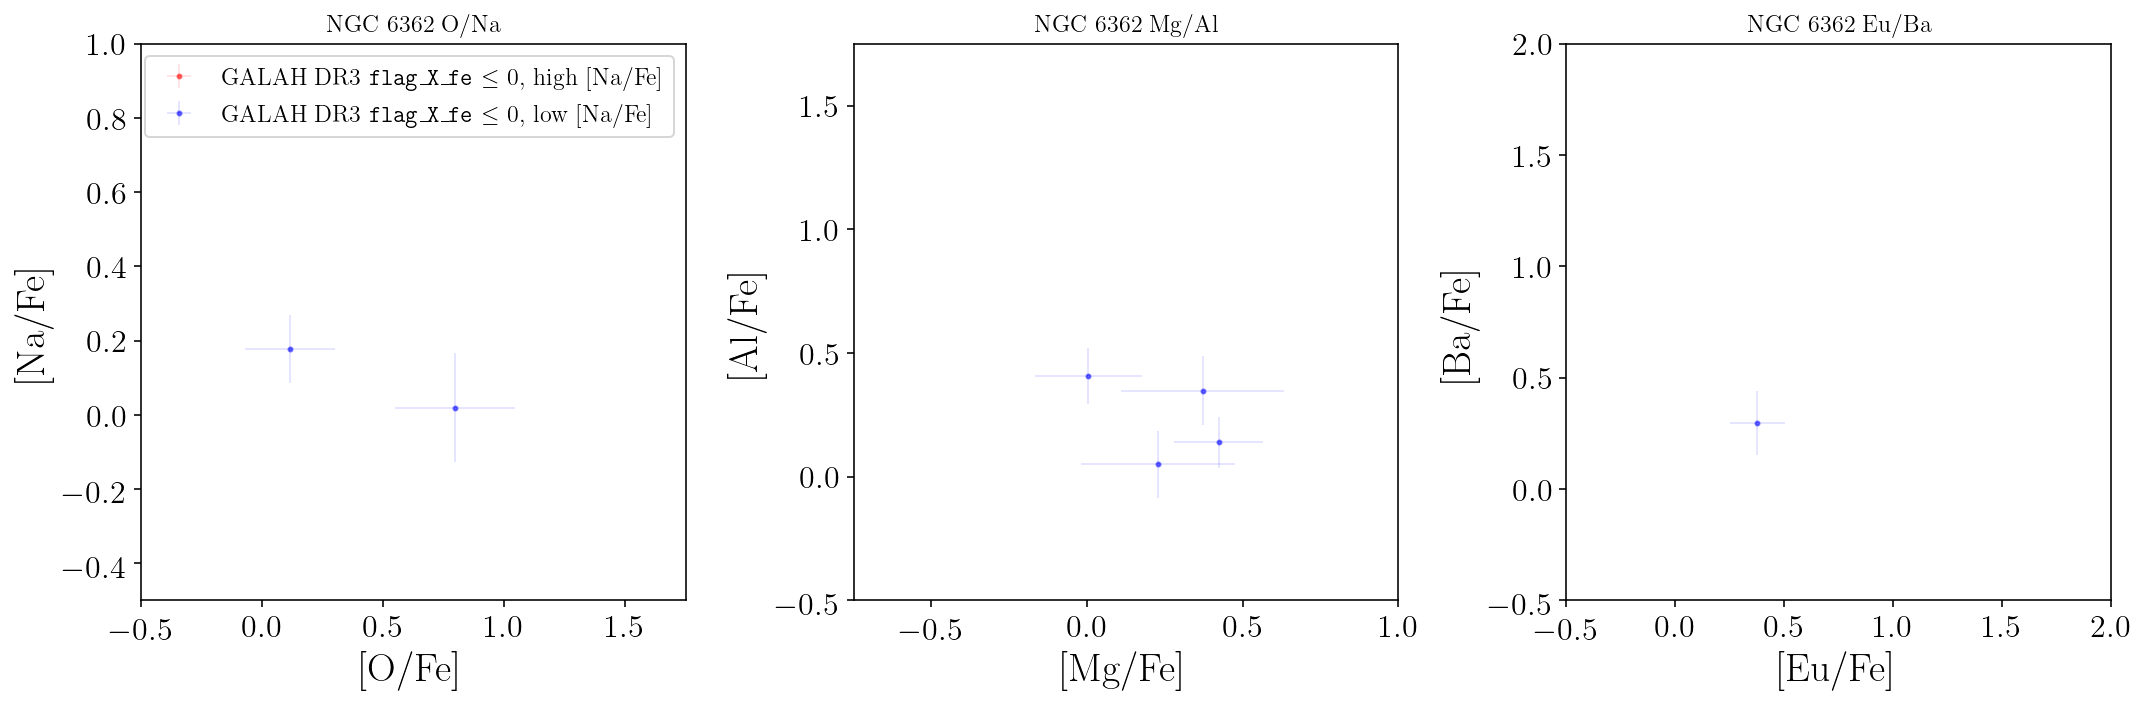

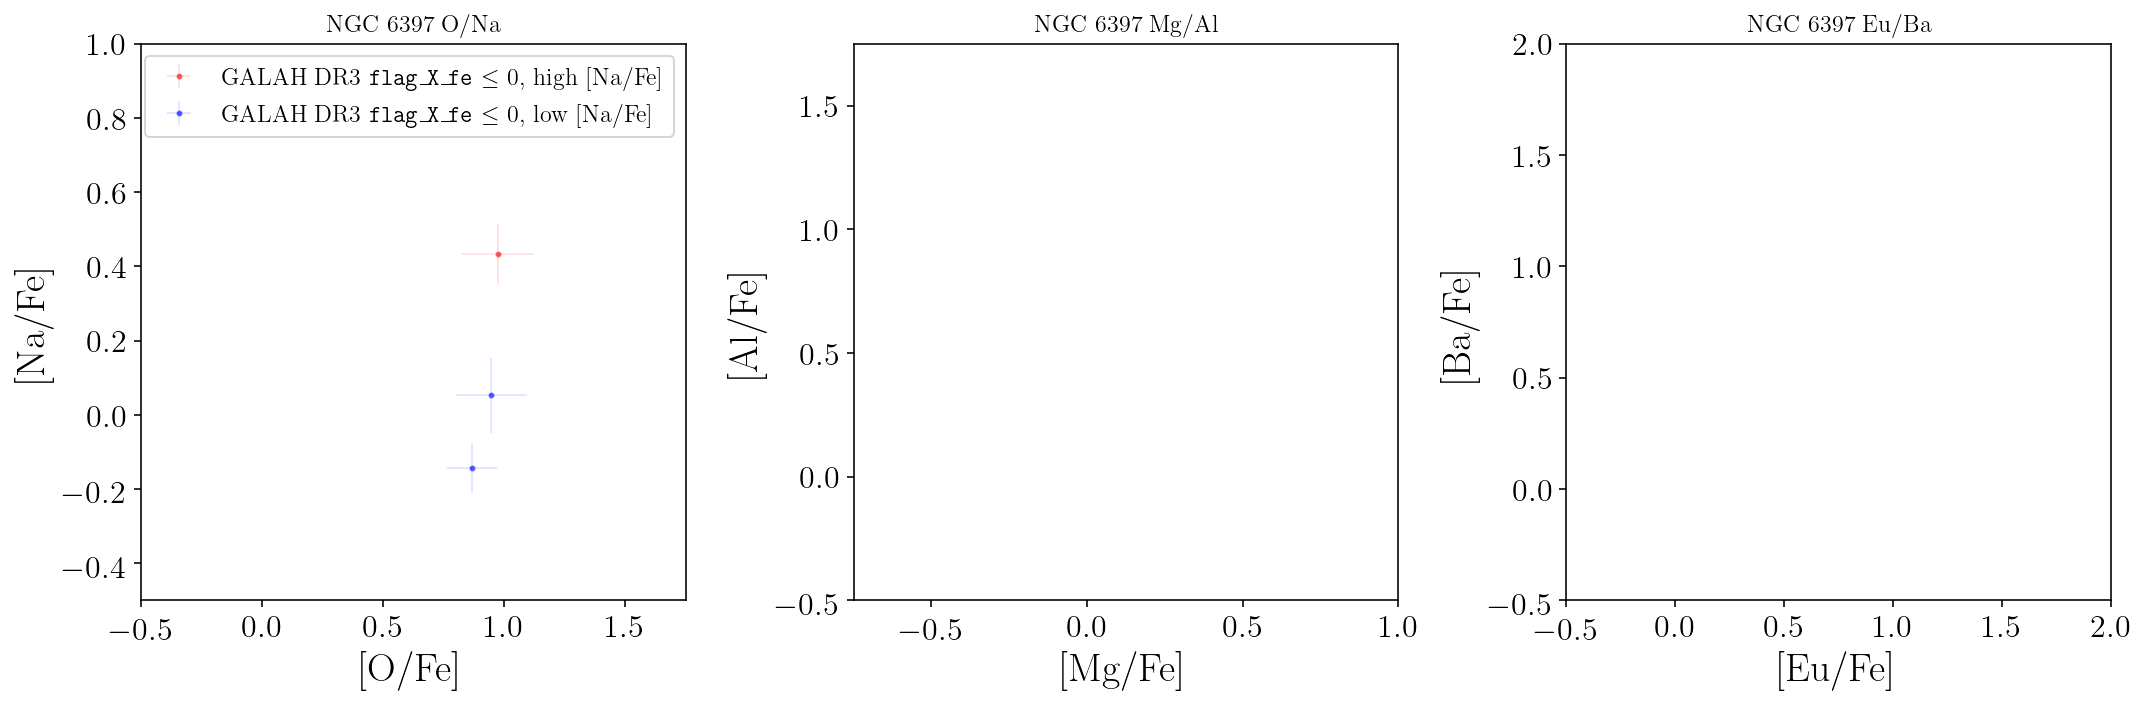

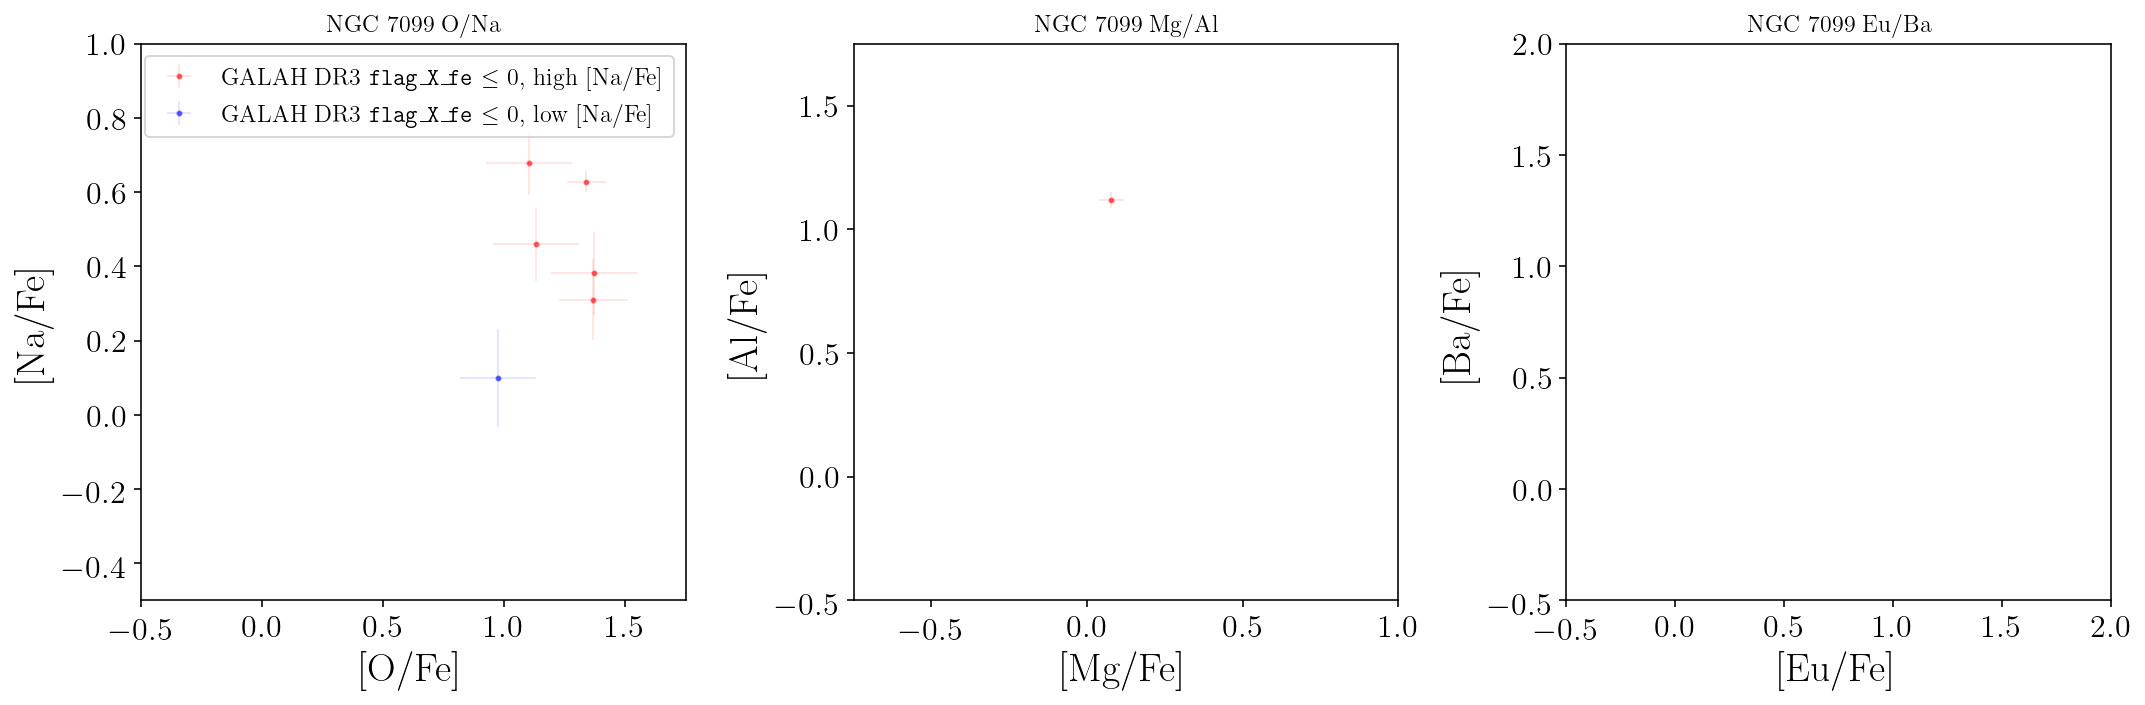

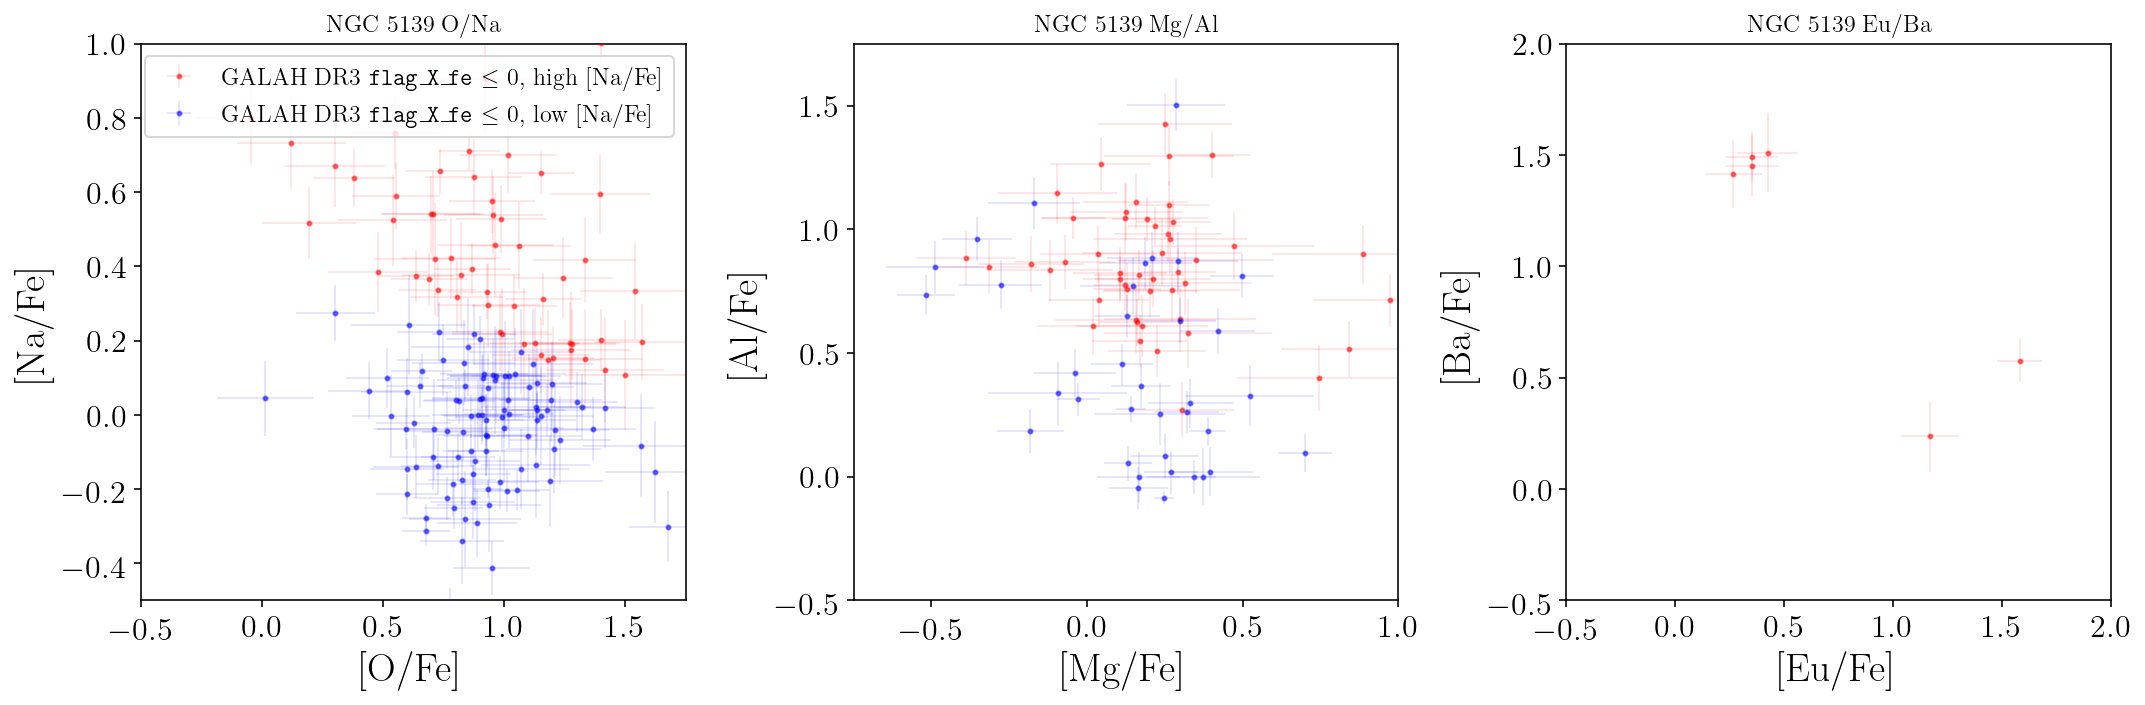

In [14]:
print("NB: Mean [Fe/H] only based on stars with 4500 < Teff < 6500 (indicated by dashed line)")

for cluster in globular_clusters['name']:

    analyse_cluster_anticorrelations(cluster_short_name = cluster, plot_flagged=False,flag_ab_cut=0)

In [15]:
def analyse_cluster_ab(cluster_short_name, elem = 'O', flag_sp_cut = 0, flag_ab_cut = 0):

    cluster_id = np.where(cluster_short_name == globular_clusters['name'])[0][0]
    cluster_oid = globular_clusters['oid'][cluster_id]

    f, gs = plt.subplots(1,3,figsize=(15,5),sharey=True)
    
    kwarfs_errorbar = dict(fmt='o',ms=2,lw=0.2)
    
    for ax_id, ax in enumerate(gs):
        
        flag_0 = (dr3['flag_sp'][cluster_oid] <= flag_sp_cut) & (dr3['e_logg'][cluster_oid] < 1) & (dr3['flag_'+elem+'_fe'][cluster_oid] <= flag_ab_cut) & np.isfinite(dr3[elem+'_fe'][cluster_oid])
        flag_not_0 = (dr3['flag_sp'][cluster_oid] > flag_sp_cut) & (dr3['e_logg'][cluster_oid] < 1) & (dr3['flag_'+elem+'_fe'][cluster_oid] > flag_ab_cut) & np.isfinite(dr3[elem+'_fe'][cluster_oid])
        flag_0_not_hotcool = flag_0 & (dr3['teff'][cluster_oid] <6500) & (dr3['teff'][cluster_oid] >4500)
        
        if ax_id == 0:

            ax.set_title(cluster_short_name.replace('_',' ')+' '+elem)
                
            mean = np.nanmean(dr3[elem+'_fe'][cluster_oid][flag_0_not_hotcool])
            std = np.nanstd(dr3[elem+'_fe'][cluster_oid][flag_0_not_hotcool])
            
            if np.isfinite(mean):

                ax.axhspan(
                    mean-std,
                    mean+std,
                    facecolor='grey',alpha=0.25
                )
                ax.axhline(
                    mean,
                    c='k'
                )

                ax.errorbar(
                    dr3['fe_h'][cluster_oid][flag_not_0],
                    dr3[elem+'_fe'][cluster_oid][flag_not_0],
                    xerr = dr3['e_fe_h'][cluster_oid][flag_not_0],
                    yerr = dr3['e_'+elem+'_fe'][cluster_oid][flag_not_0],
                    c='C3',label=r'GALAH DR3 \texttt{flag\_sp} $\neq$ 0',
                    zorder=2,
                    **kwarfs_errorbar
                )

                ax.errorbar(
                    dr3['fe_h'][cluster_oid][flag_0],
                    dr3[elem+'_fe'][cluster_oid][flag_0],
                    xerr = dr3['e_fe_h'][cluster_oid][flag_0],
                    yerr = dr3['e_'+elem+'_fe'][cluster_oid][flag_0],
                    c='k',label=r'GALAH DR3 \texttt{flag\_sp}=0',
                    zorder=3,
                    **kwarfs_errorbar
                )
            ax.invert_xaxis()
            ax.set_xlabel(r'[Fe/H]')
            ax.set_ylabel(r'['+elem+'/Fe]')
            if np.isfinite(mean):
                ax.legend(fontsize=12)
        
        if ax_id == 1:

            ax.set_title(cluster_short_name.replace('_',' ')+' '+elem)

            mean = np.mean(dr3[elem+'_fe'][cluster_oid][flag_0_not_hotcool])
            std = np.std(dr3[elem+'_fe'][cluster_oid][flag_0_not_hotcool])

            if np.isfinite(mean):
                ax.axhspan(
                    mean-std,
                    mean+std,
                    facecolor='grey',alpha=0.25,
                    label=r'GALAH DR3 ['+elem+'/Fe]: $'+"{:.2f}".format(mean)+'\pm'+"{:.2f}".format(std)+'$'
                )
                ax.axhline(
                    mean,
                    c='k'
                )

                ax.errorbar(
                    dr3['teff'][cluster_oid][flag_not_0],
                    dr3[elem+'_fe'][cluster_oid][flag_not_0],
                    xerr = dr3['e_teff'][cluster_oid][flag_not_0],
                    yerr = dr3['e_'+elem+'_fe'][cluster_oid][flag_not_0],
                    c='C3',
                    zorder=2,
                    **kwarfs_errorbar
                )

                ax.errorbar(
                    dr3['teff'][cluster_oid][flag_0],
                    dr3[elem+'_fe'][cluster_oid][flag_0],
                    xerr = dr3['e_teff'][cluster_oid][flag_0],
                    yerr = dr3['e_'+elem+'_fe'][cluster_oid][flag_0],
                    c='k',
                    zorder=3,
                    **kwarfs_errorbar
                )
            ax.axvline(4500,c='k',ls='dashed')
            ax.axvline(6500,c='k',ls='dashed')
            ax.invert_xaxis()
            ax.set_xlabel(r'$T_\text{eff}$')
            ax.set_ylabel(r'['+elem+'/Fe]')
            if np.isfinite(mean):
                ax.legend(fontsize=12)

        if ax_id == 2:

            ax.set_title(cluster_short_name.replace('_',' ')+' '+elem)

            mean = np.mean(dr3[elem+'_fe'][cluster_oid][flag_0_not_hotcool])
            std = np.std(dr3[elem+'_fe'][cluster_oid][flag_0_not_hotcool])

            if np.isfinite(mean):
                ax.axhspan(
                    mean-std,
                    mean+std,
                    facecolor='grey',alpha=0.25,
                    label=r'GALAH DR3 ['+elem+'/Fe]: $'+"{:.2f}".format(mean)+'\pm'+"{:.2f}".format(std)+'$'
                )
                ax.axhline(
                    mean,
                    c='k'
                )
                ax.errorbar(
                    dr3['logg'][cluster_oid][flag_not_0],
                    dr3[elem+'_fe'][cluster_oid][flag_not_0],
                    xerr = dr3['e_logg'][cluster_oid][flag_not_0],
                    yerr = dr3['e_'+elem+'_fe'][cluster_oid][flag_not_0],
                    c='C3',
                    zorder=2,
                    **kwarfs_errorbar
                )

                ax.errorbar(
                    dr3['logg'][cluster_oid][flag_0],
                    dr3[elem+'_fe'][cluster_oid][flag_0],
                    xerr = dr3['e_logg'][cluster_oid][flag_0],
                    yerr = dr3['e_'+elem+'_fe'][cluster_oid][flag_0],
                    c='k',
                    zorder=3,
                    **kwarfs_errorbar
                )
            ax.invert_xaxis()
            ax.set_xlabel(r'$\log g$')
            ax.set_ylabel(r'['+elem+'/Fe]')
            if np.isfinite(mean):
                ax.legend(fontsize=12)

    plt.tight_layout()
    
    plt.savefig('gc_abundance_comparison/gc_'+elem+'_'+cluster_short_name+'.png',dpi=200,bbox_inches='tight')
    
    plt.close()

47_Tuc
Li
C
O
Na
Mg
Al
Si
K
Ca
Sc
Ti
Ti2
V
Cr
Mn
Ni
Cu
Zn
Rb
Sr
Y
Zr
Mo
Ru
Ba
La
Ce
Nd
Sm
Eu
NGC_1851
Li


ValueError: output array is read-only

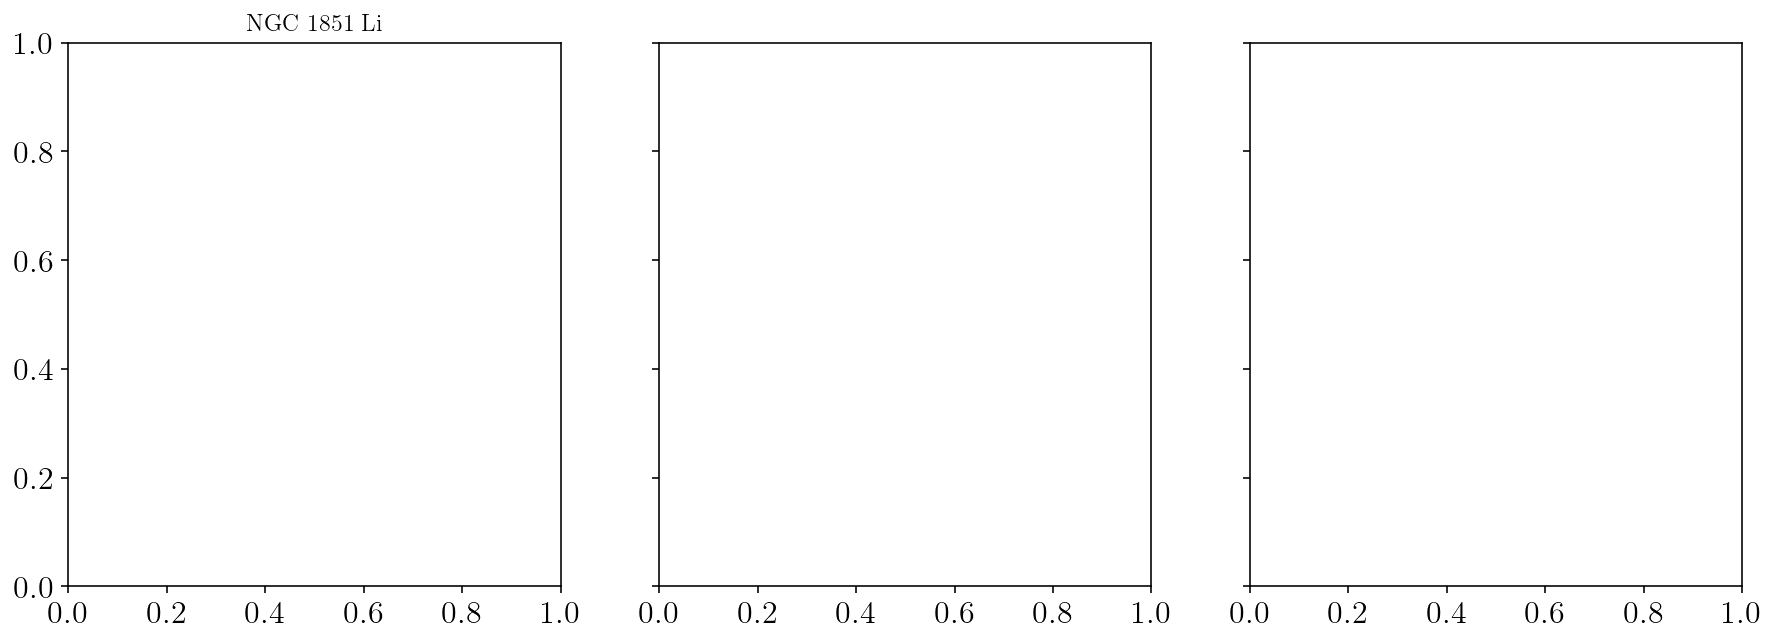

In [16]:
for cluster in ['47_Tuc', 'NGC_1851', 'NGC_288', 'NGC_362', 'NGC_6362', 'NGC_6397', 'NGC_5139']:
    html_text = [['<html><body><table>']]
    html_text.append(['<tr><td> '+cluster])
    print(cluster)
    for elem in ['Li','C','O','Na','Mg','Al','Si','K','Ca','Sc','Ti','Ti2','V','Cr','Mn','Ni','Cu','Zn','Rb','Sr','Y','Zr','Mo','Ru','Ba','La','Ce','Nd','Sm','Eu']:
        print(elem)
        analyse_cluster_ab(cluster_short_name=cluster, elem = elem)
        html_text.append(['<tr><td> <a href=gc_abundance_comparison/gc_'+elem+'_'+cluster+'.png><IMG src=gc_abundance_comparison/gc_'+elem+'_'+cluster+'.png width=750></a>'])
    html_text.append(['</table></body></html>'])
    np.savetxt('gc_abundance_comparison_'+cluster+'.html',np.array(html_text),fmt='%s')  